In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
import wandb
import torch
import torch.nn as nn
from sklearn.metrics import r2_score

In [62]:
wandb.login()

wandb: Currently logged in as: ananthu2014. Use `wandb login --relogin` to force relogin


True

### Q.2.a) Implement a single layer neural network for regression. Write backpropagation from scratch for this case in order to work for an arbitrary number of neurons in the hidden layer. Cross check your implementation by comparing with the Pytorch implementation of the same.

In [125]:
#importing data
df = pd.read_excel("E:\ID5030\HW05\Concrete_Data.xls")
print('The shape of given data is:',df.shape)
df

The shape of given data is: (1030, 9)


Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

In [126]:
#obtaining target values
Y = df.iloc[:,8]
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [127]:
#obtaining feature values
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X = np.array(X)

Number of features in the given dataset is 8


In [128]:
X=np.array(X)
Y=np.array(Y)

#### From scratch:-

In [129]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of test data is:{x_test.shape}')

The shape of training data is:(824, 8)
The shape of test data is:(206, 8)


In [130]:
'normalising data'
def normalise_data(x):
    return (x-np.mean(x,axis=0))/np.std(x,axis=0)

In [131]:
x_train=normalise_data(x_train)
x_test=normalise_data(x_test)
x_train=x_train.T
x_test=x_test.T
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 824)
(8, 206)
(1, 824)
(1, 206)


In [132]:
'identity function'
def identity_function(z):
    return z

In [133]:
'derivative of identity function'
def derivative_identity_function(z):
    return 1

In [134]:
#MEAN SQUARED ERROR FUNCTION
def mean_squared_error_function(y,ycap):
    m=y.shape[1]
    mean_square_error = (1/m)*np.sum((y-ycap)**2)
    
    return mean_square_error

In [135]:
def forward_propogation(w1,b1,w2,b2,x):
    z1=np.dot(w1,x)+b1
    a1=identity_function(z1)
    z2=np.dot(w2,a1)+b2
    a2=identity_function(z2)
    return a1,a2

In [136]:
def back_propogation(a1,a2,w1,w2,b1,b2,x,y):
        m=x.shape[1]
        dz2=a2-y
        dw2=(1/m)*np.dot(dz2,a1.T)
        db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
        dz1=(1/m)*np.dot(w2.T,dz2)*derivative_identity_function(a1)
        dw1=(1/m)*np.dot(dz1,x.T)
        db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
        return dw1,db1,dw2,db2

In [137]:
def gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2,learning_rate):
    alpha = learning_rate
    w1=w1-alpha*dw1
    w2=w2-alpha*dw2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
    return w1,w2,b1,b2
    

In [138]:
'''Iterating the model for specified number for epochs'''
def scratch_model(x_train,x_test,y_train,y_test,num_neurons,epochs,learning_rate):
    
    n,m=x_train.shape
    w1=np.random.randn(num_neurons,x_train.shape[0])
    b1=np.zeros((num_neurons,1))
    w2=np.random.randn(1,num_neurons)
    b2=np.zeros((1,1))
    J_train=[]
    J_test=[]
    R2_train=[]
    R2_test=[]
    for i in range(epochs):
        a1,a2=forward_propogation(w1,b1,w2,b2,x_train)
        dw1,db1,dw2,db2=back_propogation(a1,a2,w1,w2,b1,b2,x_train,y_train)
        w1,w2,b1,b2=gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2,learning_rate)
        cost_train=mean_squared_error_function(y_train,a2)
        r2_score_train=r2_score(y_train.T,a2.T)
        R2_train.append(r2_score_train)
        a1_test,a2_test=forward_propogation(w1,b1,w2,b2,x_test)
        J_train.append(cost_train)
        cost_test=mean_squared_error_function(y_test,a2_test)
        J_test.append(cost_test)
        r2_score_test=r2_score(y_test.T,a2_test.T)
        R2_test.append(r2_score_test)
        if (i)%(epochs/10)==0:
            print(f' \n epoch:{i:4d}  Train error:  {J_train[-1]:8.2f} R2_score train {R2_train[-1]:.2f} Val error: {J_test[-1]:8.2f}  R2_validation: {R2_test[-1]:.2f}')
            

    plt.plot(J_train,label='train cost')
    plt.plot(J_test,label='validation cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    return w1,w2,b1,b2

 
 epoch:   0  Train error:   1481.18 R2_score train -4.24 Val error:  1365.04  R2_validation: -4.24
 
 epoch: 500  Train error:    115.16 R2_score train 0.59 Val error:   130.34  R2_validation: 0.50
 
 epoch:1000  Train error:    111.95 R2_score train 0.60 Val error:   128.84  R2_validation: 0.51
 
 epoch:1500  Train error:    110.42 R2_score train 0.61 Val error:   127.80  R2_validation: 0.51
 
 epoch:2000  Train error:    109.25 R2_score train 0.61 Val error:   127.07  R2_validation: 0.51
 
 epoch:2500  Train error:    108.32 R2_score train 0.62 Val error:   126.55  R2_validation: 0.51
 
 epoch:3000  Train error:    107.53 R2_score train 0.62 Val error:   126.15  R2_validation: 0.52
 
 epoch:3500  Train error:    106.87 R2_score train 0.62 Val error:   125.85  R2_validation: 0.52
 
 epoch:4000  Train error:    106.30 R2_score train 0.62 Val error:   125.61  R2_validation: 0.52
 
 epoch:4500  Train error:    105.80 R2_score train 0.63 Val error:   125.42  R2_validation: 0.52


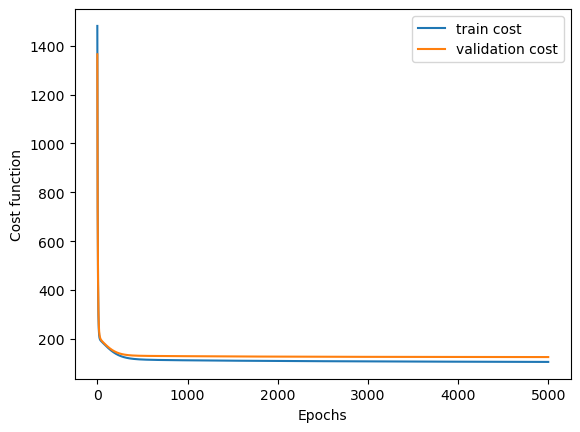

In [142]:
w1,w2,b1,b2=scratch_model(x_train,x_test,y_train,y_test,num_neurons=3,epochs=5000,learning_rate=0.1)

#### USING PYTORCH

In [182]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state=1)
print(f'The shape of test data is:{x_test.shape}')
#splitting into train and validation data

The shape of test data is:(206, 8)


In [183]:
x_train=normalise_data(x_train)
x_test=normalise_data(x_test)
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824, 1)
(206, 1)


In [184]:
x_train=torch.tensor(x_train,dtype=torch.float32)
x_test=torch.tensor(x_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)

In [191]:
def NN_model(x_train,y_train,x_val,y_val,learning_rate,hidden_size,num_epochs):
    input_size=x_train.shape[1]
    output_size=1
    model=nn.Sequential(nn.Linear(input_size,hidden_size,dtype=torch.float32),
                   nn.Linear(hidden_size,output_size,dtype=torch.float32))
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    J_train=[]
    J_val=[]
    R2_train=[]
    R2_val=[]
    for epoch in range(num_epochs):
        ypred = model(x_train)
        loss = criterion(ypred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ypred_val=model(x_val)
        loss_val=criterion(ypred_val,y_val)
        J_train.append(loss.item())
        J_val.append(loss_val.item())
        r2_score_train=R2_score(y_train,ypred)
        R2_train.append(r2_score_train)
        r2_score_val=R2_score(y_val,ypred_val)
        R2_val.append(r2_score_val)
        if (epoch+1)%(num_epochs/10)==0:
            print('Epoch [{}/{}], Train Loss: {:.2f}  Validation Loss:{:.2f}'.format(epoch+1, num_epochs, loss.item(),loss_val.item()))
            print('R2-Score-Train : {:.2f}  R2-Score-validation:{:.2f}'.format(R2_train[-1],R2_val[-1]))
    '''predicting cost of test data'''
    plt.plot(J_train,label='Train cost')
    plt.plot(J_val,label='Validation cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    return model.parameters(),ypred_test

In [192]:
para,ypred_test=NN_model(x_train,y_train,x_test,y_test,learning_rate=0.01,hidden_size=3,num_epochs=500)

Epoch [50/500], Train Loss: 1351.85  Validation Loss:1471.53
R2-Score-Train : -3.79  R2-Score-validation:-4.64
Epoch [100/500], Train Loss: 986.03  Validation Loss:1114.36
R2-Score-Train : -2.49  R2-Score-validation:-3.27
Epoch [150/500], Train Loss: 622.83  Validation Loss:731.54
R2-Score-Train : -1.20  R2-Score-validation:-1.81
Epoch [200/500], Train Loss: 305.59  Validation Loss:378.31
R2-Score-Train : -0.08  R2-Score-validation:-0.45
Epoch [250/500], Train Loss: 146.15  Validation Loss:191.27
R2-Score-Train : 0.48  R2-Score-validation:0.27
Epoch [300/500], Train Loss: 107.70  Validation Loss:136.88
R2-Score-Train : 0.62  R2-Score-validation:0.47
Epoch [350/500], Train Loss: 103.67  Validation Loss:126.97
R2-Score-Train : 0.63  R2-Score-validation:0.51
Epoch [400/500], Train Loss: 103.48  Validation Loss:125.45
R2-Score-Train : 0.63  R2-Score-validation:0.52
Epoch [450/500], Train Loss: 103.48  Validation Loss:125.26
R2-Score-Train : 0.63  R2-Score-validation:0.52
Epoch [500/500], T

### INFERENCES

Here, in the first part, back-propogation and other functions have been implemented from scratch without the use of any automatic differentiation packages such as PyTorch or Tesorflow.
In the second part, PyTorch library was used for the implementation of Neural Network for the same dataset.
It was found that the Mean square error and R2 score for train and test data were found to be similar in both cases, even though PyTorch took lesser number of epochs to converge compared to the one from scratch.

### Q.2.b) Perform hyperparameter optimization to determine the appropriate number of neurons. Do a 60-20-20 split of the dataset for training, validation and testing.

In [164]:
'''Train, test and validation split'''
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state=1)
print(f'The shape of test data is:{x_test.shape}')
#splitting into train and validation data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.25,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of validation data is:{x_val.shape}')

The shape of test data is:(206, 8)
The shape of training data is:(618, 8)
The shape of validation data is:(206, 8)


In [165]:
'''Normalising data using z-score normalisation'''
x_train=normalise_data(x_train)
x_test=normalise_data(x_test)
x_val=normalise_data(x_val)
x_train=x_train.T
x_test=x_test.T
x_val=x_val.T
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T
y_val=y_val.T
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(8, 618)
(8, 206)
(8, 206)
(1, 618)
(1, 206)
(1, 206)


 
 epoch:   0  Train error:   1660.41 R2_score train -4.88 Val error:  1254.96  R2_validation: -3.45
 
 epoch: 300  Train error:    107.77 R2_score train 0.62 Val error:   108.46  R2_validation: 0.62
 
 epoch: 600  Train error:    104.92 R2_score train 0.63 Val error:   106.09  R2_validation: 0.62
 
 epoch: 900  Train error:    103.27 R2_score train 0.63 Val error:   105.33  R2_validation: 0.63
 
 epoch:1200  Train error:    102.45 R2_score train 0.64 Val error:   105.37  R2_validation: 0.63
 
 epoch:1500  Train error:    102.15 R2_score train 0.64 Val error:   105.71  R2_validation: 0.63
 
 epoch:1800  Train error:    102.06 R2_score train 0.64 Val error:   106.00  R2_validation: 0.62
 
 epoch:2100  Train error:    102.04 R2_score train 0.64 Val error:   106.17  R2_validation: 0.62
 
 epoch:2400  Train error:    102.04 R2_score train 0.64 Val error:   106.25  R2_validation: 0.62
 
 epoch:2700  Train error:    102.04 R2_score train 0.64 Val error:   106.29  R2_validation: 0.62


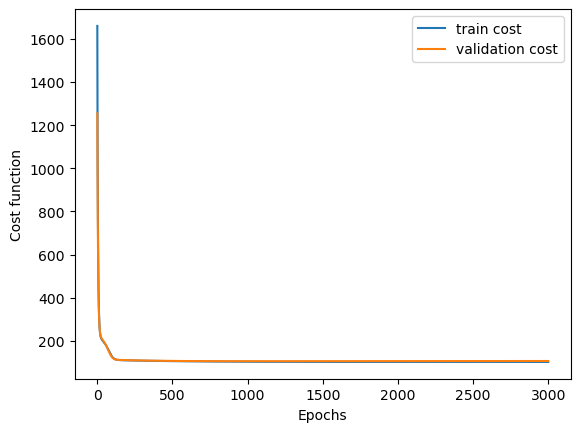

In [168]:
w1,w2,b1,b2=scratch_model(x_train,x_val,y_train,y_val,num_neurons=3,epochs=3000,learning_rate=0.1)

In [169]:
'''model evaluation using test data'''
a1,a2=forward_propogation(w1,b1,w2,b2,x_test)
cost_test=mean_squared_error_function(y_test,a2)
print(f'The value of test cost is {cost_test:.2f}')
r2_test=r2_score(y_test.T,a2.T)
print(f'R2-score of test data is :{r2_test:.3f}')

The value of test cost is 127.51
R2-score of test data is :0.511


In [170]:
'''hyper-parameter optimization'''
def model_optimization(x_train=x_train,x_val=x_val,y_train=y_train,y_val=y_val,num_neurons=2,epochs=1000,learning_rate=0.01):
    
    config_defaults = {
        'learning_rate': 0.01,
        'epochs': 2000,
        'num_neurons': 2,
        }


    wandb.init(config=config_defaults)
    config = wandb.config

    learning_rate = config.learning_rate
    epochs = config.epochs
    num_neurons = config.num_neurons
    run_name= f'lr_{learning_rate}_epoch_{epochs}_neur_{num_neurons}'
    print(run_name)
    n,m=x_train.shape
    w1=np.random.randn(num_neurons,x_train.shape[0])
    b1=np.zeros((num_neurons,1))
    w2=np.random.randn(1,num_neurons)
    b2=np.zeros((1,1))
    J_train=[]
    J_val=[]
    for i in range(epochs):
        a1,a2=forward_propogation(w1,b1,w2,b2,x_train)
        dw1,db1,dw2,db2=back_propogation(a1,a2,w1,w2,b1,b2,x_train,y_train)
        w1,w2,b1,b2=gradient_descent(w1,w2,b1,b2,dw1,dw2,db1,db2,learning_rate)
        cost_train=mean_squared_error_function(y_train,a2)
        J_train.append(cost_train)
        a1_val,a2_val=forward_propogation(w1,b1,w2,b2,x_val)
        cost_val=mean_squared_error_function(y_val,a2_val)
        J_val.append(cost_val)
        wandb.log({"cost_train": cost_train, "cost_validation": cost_val, 'epochs': i})
            
        
        if (i)%(epochs/10)==0:
            print(f' epochs {i} Train error:  {J_train[-1]:.2f}  validation error:   {J_val[-1]:.2f}')

    plt.plot(J_train,label='train cost')
    plt.plot(J_val,label='validation cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    
    wandb.run.name = run_name
    wandb.run.save()
    wandb.run.finish()
    return w1,w2,b1,b2

Create sweep with ID: rq00vkci
Sweep URL: https://wandb.ai/ananthu2014/ID5030_ML_HW05/sweeps/rq00vkci


wandb: Agent Starting Run: cox23bwa with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 2


lr_0.1_epoch_1000_neur_2
 epochs 0 Train error:  1579.46  validation error:   1317.70
 epochs 100 Train error:  282.42  validation error:   282.10
 epochs 200 Train error:  282.32  validation error:   282.03
 epochs 300 Train error:  282.18  validation error:   281.91
 epochs 400 Train error:  281.96  validation error:   281.72
 epochs 500 Train error:  281.62  validation error:   281.39
 epochs 600 Train error:  281.09  validation error:   280.87
 epochs 700 Train error:  280.28  validation error:   280.02
 epochs 800 Train error:  278.99  validation error:   278.62
 epochs 900 Train error:  276.92  validation error:   276.32


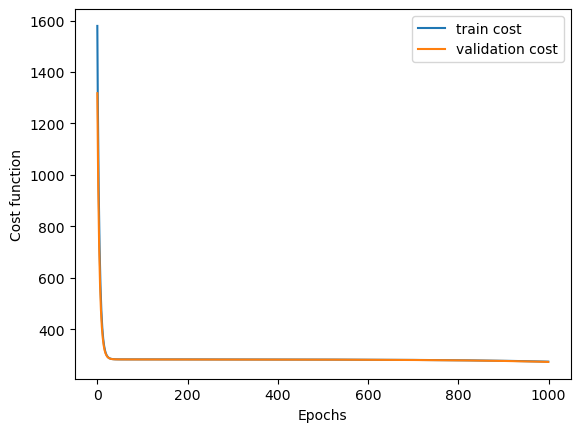

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


wandb: Agent Starting Run: 0lv6btza with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 4


lr_0.1_epoch_1000_neur_4
 epochs 0 Train error:  1545.86  validation error:   1158.36
 epochs 100 Train error:  120.72  validation error:   119.67
 epochs 200 Train error:  116.03  validation error:   115.33
 epochs 300 Train error:  113.91  validation error:   113.22
 epochs 400 Train error:  112.79  validation error:   112.02
 epochs 500 Train error:  112.06  validation error:   111.23
 epochs 600 Train error:  111.51  validation error:   110.64
 epochs 700 Train error:  111.05  validation error:   110.16
 epochs 800 Train error:  110.65  validation error:   109.76
 epochs 900 Train error:  110.29  validation error:   109.42


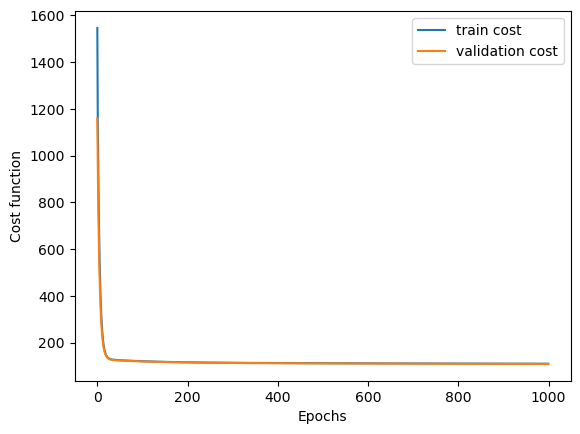

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jquknvzx with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 8


lr_0.1_epoch_1000_neur_8
 epochs 0 Train error:  1664.07  validation error:   1660.41
 epochs 100 Train error:  nan  validation error:   nan
 epochs 200 Train error:  nan  validation error:   nan
 epochs 300 Train error:  nan  validation error:   nan
 epochs 400 Train error:  nan  validation error:   nan
 epochs 500 Train error:  nan  validation error:   nan


C:\Users\anant\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 epochs 600 Train error:  nan  validation error:   nan
 epochs 700 Train error:  nan  validation error:   nan
 epochs 800 Train error:  nan  validation error:   nan
 epochs 900 Train error:  nan  validation error:   nan


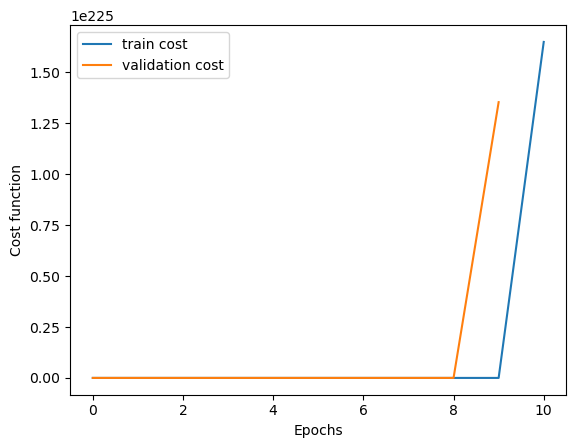

wandb: Agent Starting Run: f66e2965 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 16


lr_0.1_epoch_1000_neur_16
 epochs 0 Train error:  1583.88  validation error:   2039.87
 epochs 100 Train error:  nan  validation error:   nan
 epochs 200 Train error:  nan  validation error:   nan
 epochs 300 Train error:  nan  validation error:   nan
 epochs 400 Train error:  nan  validation error:   nan


C:\Users\anant\AppData\Local\Temp\ipykernel_21860\3701961942.py:4: RuntimeWarning: overflow encountered in square
  mean_square_error = (1/m)*np.sum((y-ycap)**2)


 epochs 500 Train error:  nan  validation error:   nan
 epochs 600 Train error:  nan  validation error:   nan
 epochs 700 Train error:  nan  validation error:   nan
 epochs 800 Train error:  nan  validation error:   nan
 epochs 900 Train error:  nan  validation error:   nan


wandb: Agent Starting Run: wyi9f6vy with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 32


lr_0.1_epoch_1000_neur_32
 epochs 0 Train error:  2037.94  validation error:   8902.96
 epochs 100 Train error:  nan  validation error:   nan
 epochs 200 Train error:  nan  validation error:   nan
 epochs 300 Train error:  nan  validation error:   nan
 epochs 400 Train error:  nan  validation error:   nan
 epochs 500 Train error:  nan  validation error:   nan
 epochs 600 Train error:  nan  validation error:   nan
 epochs 700 Train error:  nan  validation error:   nan
 epochs 800 Train error:  nan  validation error:   nan
 epochs 900 Train error:  nan  validation error:   nan


wandb: Agent Starting Run: 6zn8x8by with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 2


lr_0.01_epoch_1000_neur_2
 epochs 0 Train error:  1589.58  validation error:   1559.82
 epochs 100 Train error:  406.93  validation error:   417.81
 epochs 200 Train error:  260.75  validation error:   271.64
 epochs 300 Train error:  238.76  validation error:   248.91
 epochs 400 Train error:  232.91  validation error:   242.77
 epochs 500 Train error:  229.07  validation error:   238.88
 epochs 600 Train error:  225.40  validation error:   235.25
 epochs 700 Train error:  221.66  validation error:   231.56
 epochs 800 Train error:  217.83  validation error:   227.78
 epochs 900 Train error:  213.92  validation error:   223.90


wandb: Agent Starting Run: okb8afou with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 4


lr_0.01_epoch_1000_neur_4
 epochs 0 Train error:  1538.48  validation error:   1522.01
 epochs 100 Train error:  432.99  validation error:   430.06
 epochs 200 Train error:  286.22  validation error:   283.93
 epochs 300 Train error:  263.90  validation error:   261.30
 epochs 400 Train error:  257.53  validation error:   255.12
 epochs 500 Train error:  252.55  validation error:   250.67
 epochs 600 Train error:  246.80  validation error:   245.64
 epochs 700 Train error:  239.77  validation error:   239.39
 epochs 800 Train error:  231.09  validation error:   231.46
 epochs 900 Train error:  220.49  validation error:   221.47


wandb: Agent Starting Run: pxdujdvl with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 8


lr_0.01_epoch_1000_neur_8
 epochs 0 Train error:  1707.41  validation error:   1641.18
 epochs 100 Train error:  267.60  validation error:   266.39
 epochs 200 Train error:  127.06  validation error:   126.01
 epochs 300 Train error:  112.23  validation error:   110.49
 epochs 400 Train error:  110.24  validation error:   108.27
 epochs 500 Train error:  109.53  validation error:   107.60
 epochs 600 Train error:  108.97  validation error:   107.17
 epochs 700 Train error:  108.45  validation error:   106.83
 epochs 800 Train error:  107.96  validation error:   106.53
 epochs 900 Train error:  107.50  validation error:   106.25


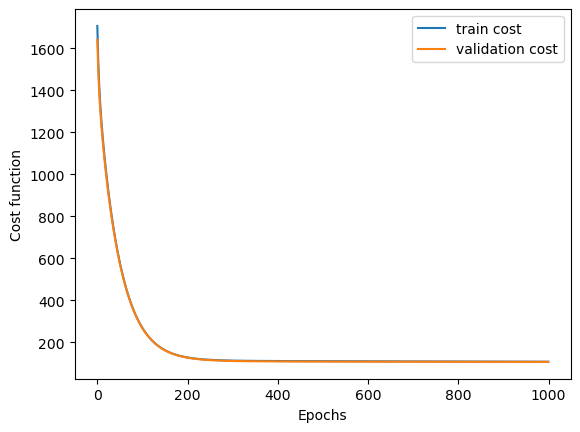

wandb: Agent Starting Run: a6981det with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 16


lr_0.01_epoch_1000_neur_16
 epochs 0 Train error:  1923.09  validation error:   1673.16
 epochs 100 Train error:  259.11  validation error:   262.60
 epochs 200 Train error:  121.01  validation error:   124.26
 epochs 300 Train error:  104.85  validation error:   107.60
 epochs 400 Train error:  102.90  validation error:   105.58
 epochs 500 Train error:  102.56  validation error:   105.34
 epochs 600 Train error:  102.43  validation error:   105.35
 epochs 700 Train error:  102.34  validation error:   105.41
 epochs 800 Train error:  102.27  validation error:   105.48
 epochs 900 Train error:  102.22  validation error:   105.55


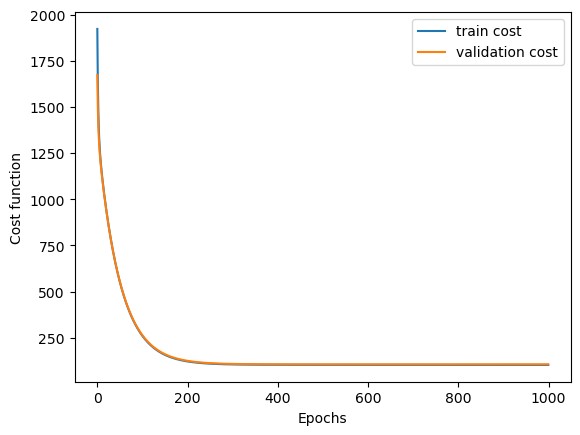

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ucxbblq4 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 32


lr_0.01_epoch_1000_neur_32
 epochs 0 Train error:  1587.15  validation error:   1477.85
 epochs 100 Train error:  239.97  validation error:   242.68
 epochs 200 Train error:  113.98  validation error:   118.06
 epochs 300 Train error:  102.94  validation error:   107.09
 epochs 400 Train error:  102.10  validation error:   106.30
 epochs 500 Train error:  102.04  validation error:   106.28
 epochs 600 Train error:  102.04  validation error:   106.30
 epochs 700 Train error:  102.04  validation error:   106.31
 epochs 800 Train error:  102.04  validation error:   106.32
 epochs 900 Train error:  102.04  validation error:   106.32


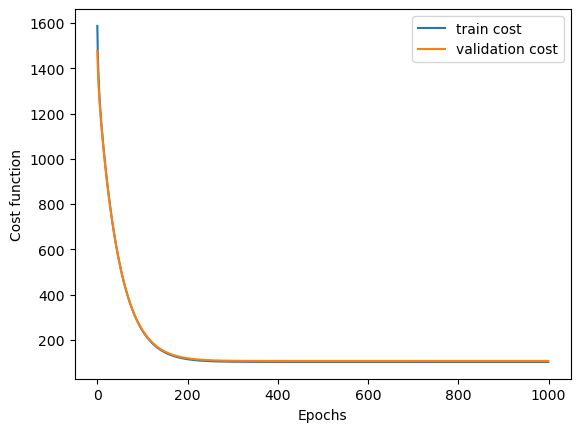

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yv0ivj38 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 2


lr_0.001_epoch_1000_neur_2
 epochs 0 Train error:  1583.20  validation error:   1594.40
 epochs 100 Train error:  1274.02  validation error:   1276.71
 epochs 200 Train error:  1083.44  validation error:   1082.91
 epochs 300 Train error:  929.26  validation error:   927.04
 epochs 400 Train error:  803.15  validation error:   799.60
 epochs 500 Train error:  699.94  validation error:   695.20
 epochs 600 Train error:  615.44  validation error:   609.63
 epochs 700 Train error:  546.28  validation error:   539.48
 epochs 800 Train error:  489.65  validation error:   481.95
 epochs 900 Train error:  443.28  validation error:   434.77


wandb: Agent Starting Run: 0ukvah5v with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 4


lr_0.001_epoch_1000_neur_4
 epochs 0 Train error:  1574.27  validation error:   1583.99
 epochs 100 Train error:  1244.92  validation error:   1254.33
 epochs 200 Train error:  1011.78  validation error:   1023.40
 epochs 300 Train error:  834.46  validation error:   848.33
 epochs 400 Train error:  695.06  validation error:   710.69
 epochs 500 Train error:  583.84  validation error:   600.72
 epochs 600 Train error:  494.56  validation error:   512.29
 epochs 700 Train error:  422.72  validation error:   440.98
 epochs 800 Train error:  364.86  validation error:   383.41
 epochs 900 Train error:  318.26  validation error:   336.94


wandb: Agent Starting Run: li4btkjc with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 8


lr_0.001_epoch_1000_neur_8
 epochs 0 Train error:  1572.56  validation error:   1538.67
 epochs 100 Train error:  1194.31  validation error:   1200.91
 epochs 200 Train error:  974.65  validation error:   981.58
 epochs 300 Train error:  805.54  validation error:   812.14
 epochs 400 Train error:  671.65  validation error:   677.75
 epochs 500 Train error:  564.34  validation error:   569.84
 epochs 600 Train error:  477.85  validation error:   482.73
 epochs 700 Train error:  407.96  validation error:   412.22
 epochs 800 Train error:  351.43  validation error:   355.10
 epochs 900 Train error:  305.68  validation error:   308.79


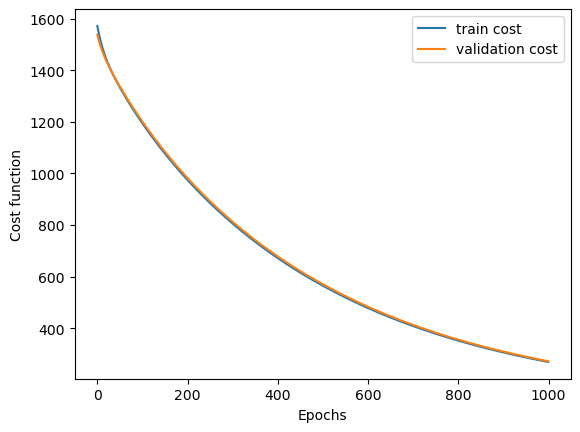

wandb: Agent Starting Run: 2ryktyl2 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 16


lr_0.001_epoch_1000_neur_16
 epochs 0 Train error:  1404.97  validation error:   1403.57
 epochs 100 Train error:  1136.21  validation error:   1145.20
 epochs 200 Train error:  942.42  validation error:   951.57
 epochs 300 Train error:  786.11  validation error:   794.79
 epochs 400 Train error:  658.85  validation error:   666.84
 epochs 500 Train error:  555.08  validation error:   562.34
 epochs 600 Train error:  470.48  validation error:   477.04
 epochs 700 Train error:  401.54  validation error:   407.45
 epochs 800 Train error:  345.40  validation error:   350.73
 epochs 900 Train error:  299.72  validation error:   304.53


wandb: Agent Starting Run: 010s03p8 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 32


lr_0.001_epoch_1000_neur_32
 epochs 0 Train error:  1626.48  validation error:   1661.84
 epochs 100 Train error:  1145.33  validation error:   1162.42
 epochs 200 Train error:  936.32  validation error:   948.01
 epochs 300 Train error:  774.87  validation error:   784.11
 epochs 400 Train error:  645.12  validation error:   652.92
 epochs 500 Train error:  540.01  validation error:   546.84
 epochs 600 Train error:  454.71  validation error:   460.82
 epochs 700 Train error:  385.51  validation error:   391.05
 epochs 800 Train error:  329.44  validation error:   334.51
 epochs 900 Train error:  284.09  validation error:   288.78


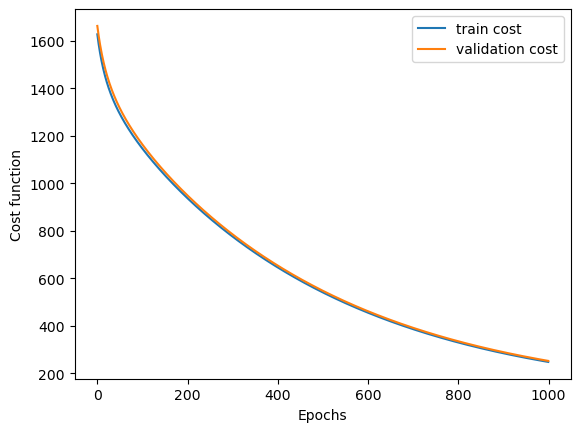

wandb: Agent Starting Run: knmx9o0p with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 2


lr_0.0001_epoch_1000_neur_2
 epochs 0 Train error:  1601.65  validation error:   1606.13
 epochs 100 Train error:  1552.78  validation error:   1559.18
 epochs 200 Train error:  1509.23  validation error:   1517.34
 epochs 300 Train error:  1469.98  validation error:   1479.62
 epochs 400 Train error:  1434.25  validation error:   1445.26
 epochs 500 Train error:  1401.41  validation error:   1413.63
 epochs 600 Train error:  1370.96  validation error:   1384.25
 epochs 700 Train error:  1342.49  validation error:   1356.72
 epochs 800 Train error:  1315.68  validation error:   1330.74
 epochs 900 Train error:  1290.29  validation error:   1306.07


wandb: Agent Starting Run: 0ml8k6xm with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 4


lr_0.0001_epoch_1000_neur_4
 epochs 0 Train error:  1633.86  validation error:   1649.33
 epochs 100 Train error:  1582.58  validation error:   1597.57
 epochs 200 Train error:  1537.50  validation error:   1551.77
 epochs 300 Train error:  1496.57  validation error:   1509.98
 epochs 400 Train error:  1458.60  validation error:   1471.10
 epochs 500 Train error:  1422.89  validation error:   1434.49
 epochs 600 Train error:  1388.99  validation error:   1399.72
 epochs 700 Train error:  1356.62  validation error:   1366.53
 epochs 800 Train error:  1325.56  validation error:   1334.73
 epochs 900 Train error:  1295.68  validation error:   1304.18


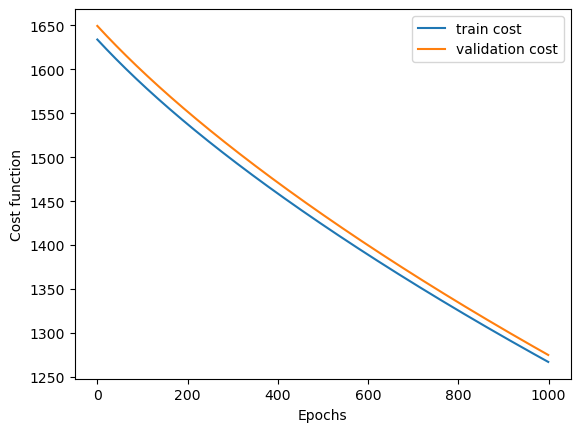

wandb: Agent Starting Run: kkza8aob with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 8


lr_0.0001_epoch_1000_neur_8
 epochs 0 Train error:  1536.62  validation error:   1550.49
 epochs 100 Train error:  1485.50  validation error:   1497.01
 epochs 200 Train error:  1439.60  validation error:   1449.42
 epochs 300 Train error:  1397.93  validation error:   1406.56
 epochs 400 Train error:  1359.73  validation error:   1367.54
 epochs 500 Train error:  1324.41  validation error:   1331.67
 epochs 600 Train error:  1291.48  validation error:   1298.40
 epochs 700 Train error:  1260.58  validation error:   1267.31
 epochs 800 Train error:  1231.43  validation error:   1238.06
 epochs 900 Train error:  1203.77  validation error:   1210.39


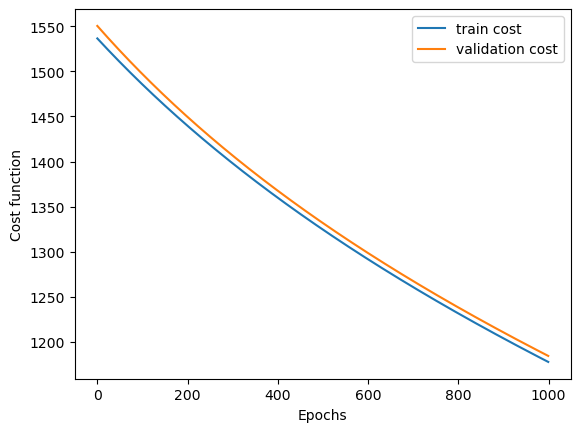

wandb: Agent Starting Run: dz1f2pgv with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 16


lr_0.0001_epoch_1000_neur_16
 epochs 0 Train error:  1747.68  validation error:   1753.86
 epochs 100 Train error:  1595.85  validation error:   1601.64
 epochs 200 Train error:  1496.51  validation error:   1502.41
 epochs 300 Train error:  1425.87  validation error:   1432.33
 epochs 400 Train error:  1371.72  validation error:   1378.98
 epochs 500 Train error:  1327.53  validation error:   1335.69
 epochs 600 Train error:  1289.70  validation error:   1298.72
 epochs 700 Train error:  1256.14  validation error:   1265.93
 epochs 800 Train error:  1225.60  validation error:   1236.04
 epochs 900 Train error:  1197.27  validation error:   1208.24


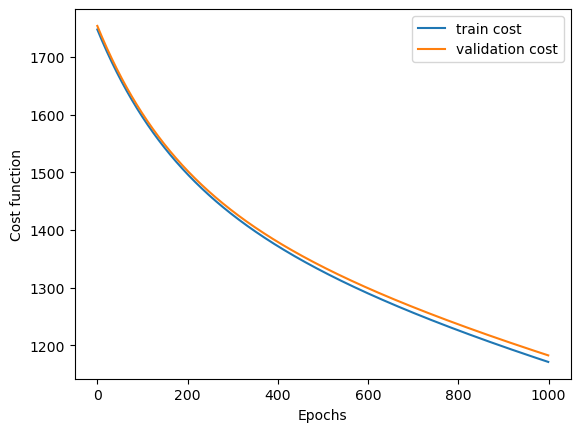

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 7j0k4yq7 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 32


lr_0.0001_epoch_1000_neur_32
 epochs 0 Train error:  1789.43  validation error:   1751.14
 epochs 100 Train error:  1534.70  validation error:   1522.72
 epochs 200 Train error:  1414.12  validation error:   1413.84
 epochs 300 Train error:  1344.76  validation error:   1350.35
 epochs 400 Train error:  1297.58  validation error:   1306.39
 epochs 500 Train error:  1261.17  validation error:   1271.87
 epochs 600 Train error:  1230.53  validation error:   1242.37
 epochs 700 Train error:  1203.25  validation error:   1215.77
 epochs 800 Train error:  1178.07  validation error:   1190.96
 epochs 900 Train error:  1154.31  validation error:   1167.37


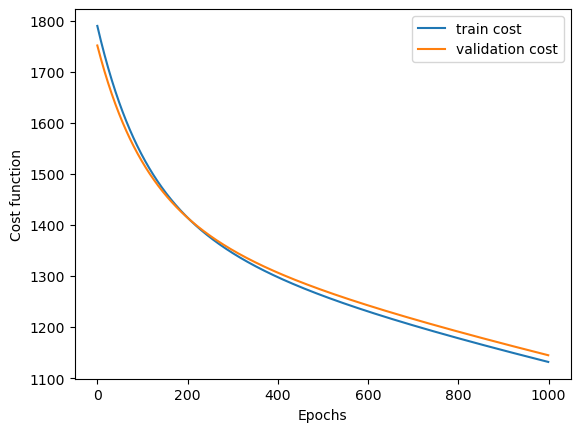

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: n1ck6r5z with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 2


lr_1e-05_epoch_1000_neur_2
 epochs 0 Train error:  1526.23  validation error:   1530.34
 epochs 100 Train error:  1523.52  validation error:   1527.71
 epochs 200 Train error:  1520.82  validation error:   1525.08
 epochs 300 Train error:  1518.12  validation error:   1522.46
 epochs 400 Train error:  1515.43  validation error:   1519.84
 epochs 500 Train error:  1512.75  validation error:   1517.23
 epochs 600 Train error:  1510.07  validation error:   1514.63
 epochs 700 Train error:  1507.40  validation error:   1512.03
 epochs 800 Train error:  1504.74  validation error:   1509.43
 epochs 900 Train error:  1502.08  validation error:   1506.85


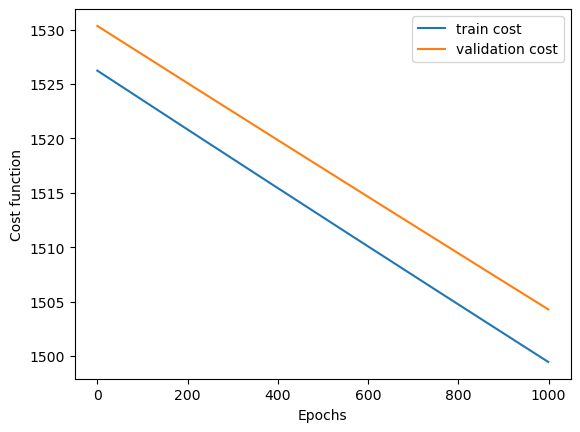

wandb: Agent Starting Run: 8m7u6dcx with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 4


lr_1e-05_epoch_1000_neur_4
 epochs 0 Train error:  1522.79  validation error:   1536.36
 epochs 100 Train error:  1519.81  validation error:   1533.26
 epochs 200 Train error:  1516.83  validation error:   1530.18
 epochs 300 Train error:  1513.87  validation error:   1527.11
 epochs 400 Train error:  1510.92  validation error:   1524.05
 epochs 500 Train error:  1507.99  validation error:   1521.01
 epochs 600 Train error:  1505.07  validation error:   1517.98
 epochs 700 Train error:  1502.16  validation error:   1514.97
 epochs 800 Train error:  1499.26  validation error:   1511.97
 epochs 900 Train error:  1496.38  validation error:   1508.98


wandb: Agent Starting Run: 1lfkh689 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 8


lr_1e-05_epoch_1000_neur_8
 epochs 0 Train error:  1610.89  validation error:   1614.93
 epochs 100 Train error:  1603.21  validation error:   1606.99
 epochs 200 Train error:  1595.66  validation error:   1599.17
 epochs 300 Train error:  1588.22  validation error:   1591.49
 epochs 400 Train error:  1580.90  validation error:   1583.93
 epochs 500 Train error:  1573.69  validation error:   1576.49
 epochs 600 Train error:  1566.59  validation error:   1569.18
 epochs 700 Train error:  1559.60  validation error:   1561.98
 epochs 800 Train error:  1552.71  validation error:   1554.90
 epochs 900 Train error:  1545.93  validation error:   1547.93


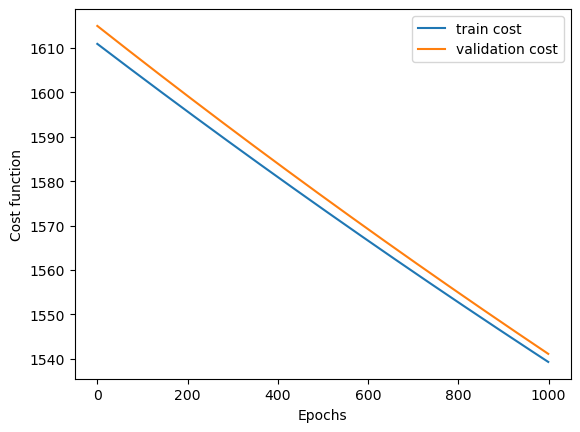

wandb: Agent Starting Run: ezjklc13 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 16


lr_1e-05_epoch_1000_neur_16
 epochs 0 Train error:  1646.96  validation error:   1683.48
 epochs 100 Train error:  1635.35  validation error:   1670.94
 epochs 200 Train error:  1624.30  validation error:   1659.03
 epochs 300 Train error:  1613.77  validation error:   1647.67
 epochs 400 Train error:  1603.72  validation error:   1636.83
 epochs 500 Train error:  1594.08  validation error:   1626.46
 epochs 600 Train error:  1584.85  validation error:   1616.52
 epochs 700 Train error:  1575.97  validation error:   1606.98
 epochs 800 Train error:  1567.42  validation error:   1597.81
 epochs 900 Train error:  1559.17  validation error:   1588.98


wandb: Agent Starting Run: pyg12339 with config:
wandb: 	epochs: 1000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 32


lr_1e-05_epoch_1000_neur_32
 epochs 0 Train error:  1880.94  validation error:   1815.64
 epochs 100 Train error:  1828.97  validation error:   1769.40
 epochs 200 Train error:  1782.67  validation error:   1728.30
 epochs 300 Train error:  1741.32  validation error:   1691.68
 epochs 400 Train error:  1704.30  validation error:   1658.97
 epochs 500 Train error:  1671.07  validation error:   1629.67
 epochs 600 Train error:  1641.17  validation error:   1603.37
 epochs 700 Train error:  1614.19  validation error:   1579.69
 epochs 800 Train error:  1589.78  validation error:   1558.30
 epochs 900 Train error:  1567.63  validation error:   1538.93


wandb: Agent Starting Run: mus6dwt1 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 2


lr_0.1_epoch_20000_neur_2
 epochs 0 Train error:  1559.80  validation error:   1304.97
 epochs 2000 Train error:  105.37  validation error:   106.11
 epochs 4000 Train error:  102.91  validation error:   105.32
 epochs 6000 Train error:  102.13  validation error:   105.77
 epochs 8000 Train error:  102.04  validation error:   106.18
 epochs 10000 Train error:  102.04  validation error:   106.29
 epochs 12000 Train error:  102.04  validation error:   106.31
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


wandb: Agent Starting Run: el874mq8 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 4


lr_0.1_epoch_20000_neur_4
 epochs 0 Train error:  1527.69  validation error:   1195.56
 epochs 2000 Train error:  102.04  validation error:   106.19
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


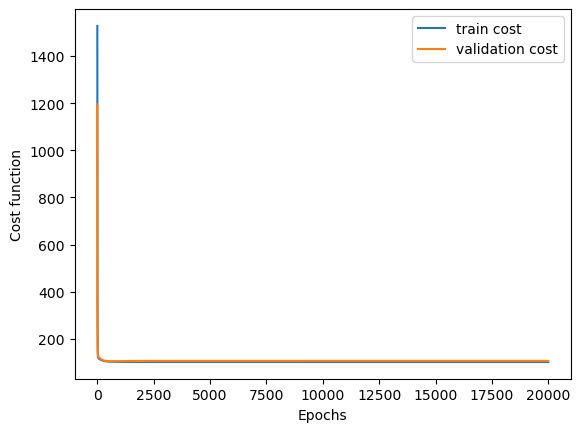

wandb: Agent Starting Run: hqhqei40 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 8


lr_0.1_epoch_20000_neur_8
 epochs 0 Train error:  1671.29  validation error:   1712.84
 epochs 2000 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


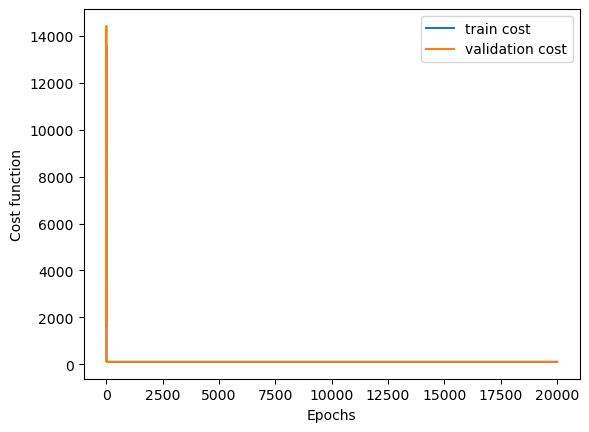

wandb: Agent Starting Run: cp14pi9m with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 16


lr_0.1_epoch_20000_neur_16
 epochs 0 Train error:  1786.10  validation error:   1926.77
 epochs 2000 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


wandb: Agent Starting Run: 293mr4zu with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 32


lr_0.1_epoch_20000_neur_32
 epochs 0 Train error:  1686.38  validation error:   3058.01
 epochs 2000 Train error:  nan  validation error:   nan
 epochs 4000 Train error:  nan  validation error:   nan
 epochs 6000 Train error:  nan  validation error:   nan
 epochs 8000 Train error:  nan  validation error:   nan
 epochs 10000 Train error:  nan  validation error:   nan
 epochs 12000 Train error:  nan  validation error:   nan
 epochs 14000 Train error:  nan  validation error:   nan
 epochs 16000 Train error:  nan  validation error:   nan
 epochs 18000 Train error:  nan  validation error:   nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tgn5t8sh with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 2


lr_0.01_epoch_20000_neur_2
 epochs 0 Train error:  1604.31  validation error:   1573.05
 epochs 2000 Train error:  137.45  validation error:   139.18
 epochs 4000 Train error:  113.95  validation error:   115.70
 epochs 6000 Train error:  109.20  validation error:   110.25
 epochs 8000 Train error:  108.04  validation error:   108.75
 epochs 10000 Train error:  107.48  validation error:   108.06
 epochs 12000 Train error:  107.04  validation error:   107.60
 epochs 14000 Train error:  106.64  validation error:   107.23
 epochs 16000 Train error:  106.28  validation error:   106.92
 epochs 18000 Train error:  105.94  validation error:   106.66


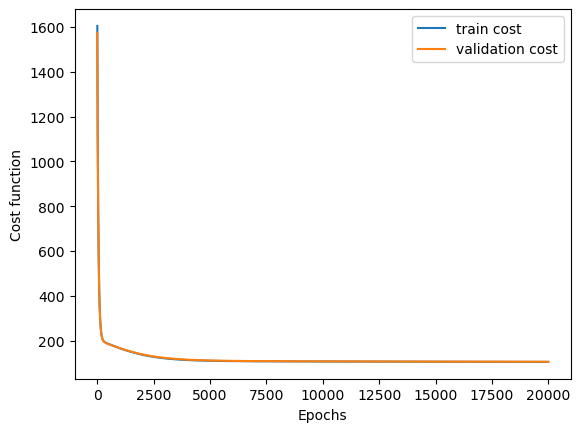

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xuylgiwn with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 4


lr_0.01_epoch_20000_neur_4
 epochs 0 Train error:  1626.41  validation error:   1555.33
 epochs 2000 Train error:  105.99  validation error:   110.28
 epochs 4000 Train error:  103.57  validation error:   107.32
 epochs 6000 Train error:  102.90  validation error:   106.40
 epochs 8000 Train error:  102.53  validation error:   105.99
 epochs 10000 Train error:  102.33  validation error:   105.83
 epochs 12000 Train error:  102.22  validation error:   105.81
 epochs 14000 Train error:  102.15  validation error:   105.85
 epochs 16000 Train error:  102.11  validation error:   105.91
 epochs 18000 Train error:  102.08  validation error:   105.98


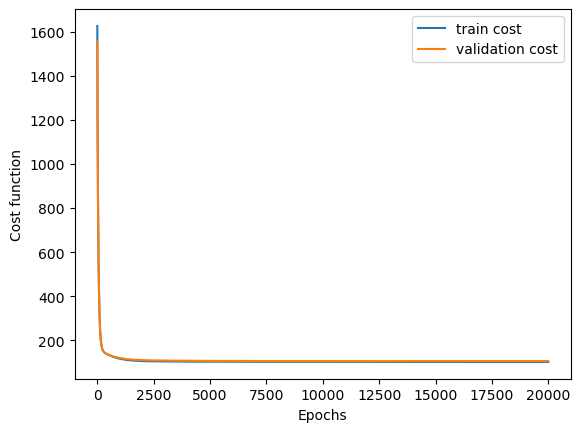

wandb: Agent Starting Run: 0tw8sqv7 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 8


lr_0.01_epoch_20000_neur_8
 epochs 0 Train error:  1424.28  validation error:   1384.68
 epochs 2000 Train error:  102.17  validation error:   105.67
 epochs 4000 Train error:  102.04  validation error:   106.23
 epochs 6000 Train error:  102.04  validation error:   106.31
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


wandb: Agent Starting Run: dkuqcbzu with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 16


lr_0.01_epoch_20000_neur_16
 epochs 0 Train error:  1853.83  validation error:   1569.36
 epochs 2000 Train error:  102.04  validation error:   106.30
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3tfz424r with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 32


lr_0.01_epoch_20000_neur_32
 epochs 0 Train error:  2622.02  validation error:   1563.06
 epochs 2000 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


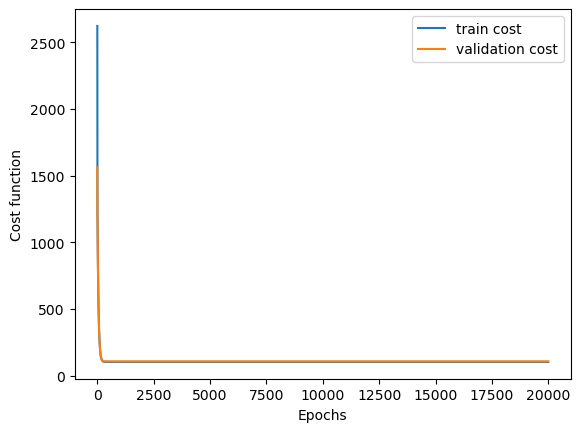

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: usyyls2k with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 2


lr_0.001_epoch_20000_neur_2
 epochs 0 Train error:  1513.16  validation error:   1534.24
 epochs 2000 Train error:  269.73  validation error:   276.14
 epochs 4000 Train error:  236.27  validation error:   240.09
 epochs 6000 Train error:  220.82  validation error:   223.29
 epochs 8000 Train error:  204.00  validation error:   205.39
 epochs 10000 Train error:  187.00  validation error:   187.47
 epochs 12000 Train error:  171.10  validation error:   170.85
 epochs 14000 Train error:  157.20  validation error:   156.46
 epochs 16000 Train error:  145.78  validation error:   144.79
 epochs 18000 Train error:  136.92  validation error:   135.90


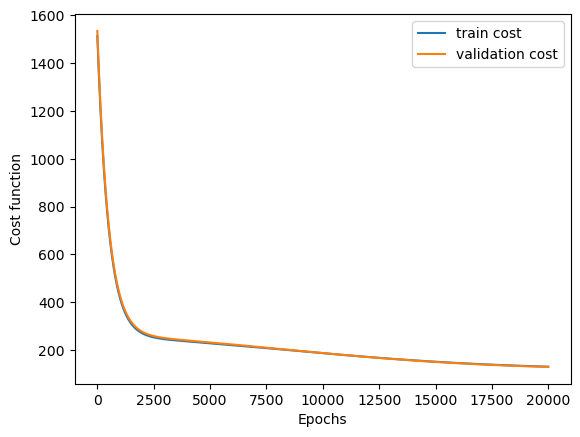

wandb: Agent Starting Run: lcdde2lj with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 4


lr_0.001_epoch_20000_neur_4
 epochs 0 Train error:  1502.25  validation error:   1505.95
 epochs 2000 Train error:  224.12  validation error:   220.31
 epochs 4000 Train error:  195.02  validation error:   190.57
 epochs 6000 Train error:  185.99  validation error:   182.64
 epochs 8000 Train error:  177.02  validation error:   175.12
 epochs 10000 Train error:  167.97  validation error:   167.59
 epochs 12000 Train error:  159.12  validation error:   160.21
 epochs 14000 Train error:  150.75  validation error:   153.16
 epochs 16000 Train error:  143.12  validation error:   146.62
 epochs 18000 Train error:  136.41  validation error:   140.75


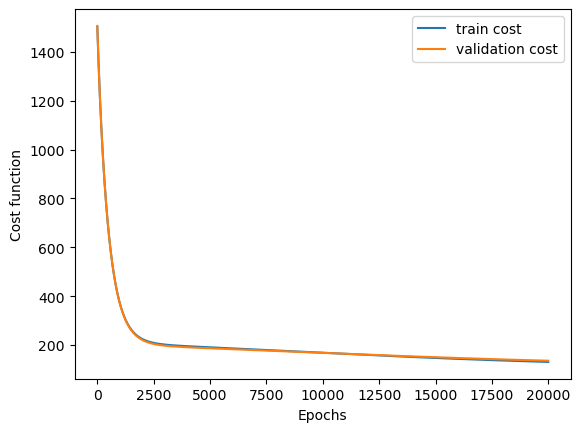

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o1b6p3s0 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 8


lr_0.001_epoch_20000_neur_8
 epochs 0 Train error:  1538.53  validation error:   1525.46
 epochs 2000 Train error:  156.99  validation error:   160.96
 epochs 4000 Train error:  127.52  validation error:   129.74
 epochs 6000 Train error:  117.41  validation error:   118.82
 epochs 8000 Train error:  109.71  validation error:   110.76
 epochs 10000 Train error:  105.63  validation error:   106.76
 epochs 12000 Train error:  104.05  validation error:   105.47
 epochs 14000 Train error:  103.50  validation error:   105.19
 epochs 16000 Train error:  103.25  validation error:   105.16
 epochs 18000 Train error:  103.08  validation error:   105.16


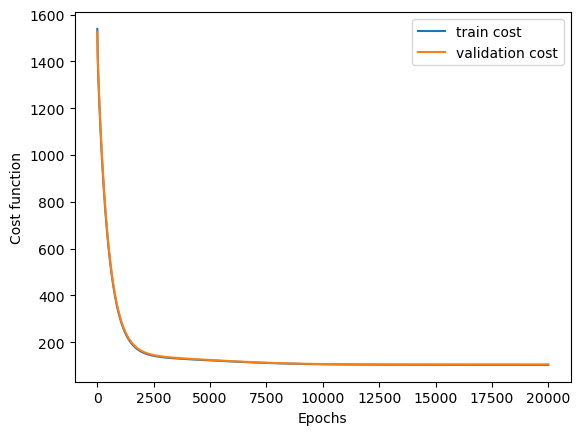

wandb: Agent Starting Run: vqprjomf with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 16


lr_0.001_epoch_20000_neur_16
 epochs 0 Train error:  1639.21  validation error:   1598.71
 epochs 2000 Train error:  118.63  validation error:   123.99
 epochs 4000 Train error:  102.21  validation error:   106.47
 epochs 6000 Train error:  102.04  validation error:   106.27
 epochs 8000 Train error:  102.04  validation error:   106.30
 epochs 10000 Train error:  102.04  validation error:   106.31
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


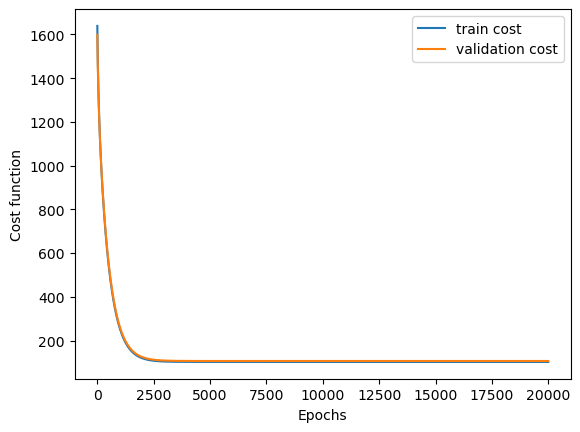

wandb: Agent Starting Run: mson2zpx with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 32


lr_0.001_epoch_20000_neur_32
 epochs 0 Train error:  1588.16  validation error:   1591.16
 epochs 2000 Train error:  115.84  validation error:   120.42
 epochs 4000 Train error:  102.13  validation error:   106.39
 epochs 6000 Train error:  102.04  validation error:   106.31
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 10000 Train error:  102.04  validation error:   106.32
 epochs 12000 Train error:  102.04  validation error:   106.32
 epochs 14000 Train error:  102.04  validation error:   106.32
 epochs 16000 Train error:  102.04  validation error:   106.32
 epochs 18000 Train error:  102.04  validation error:   106.32


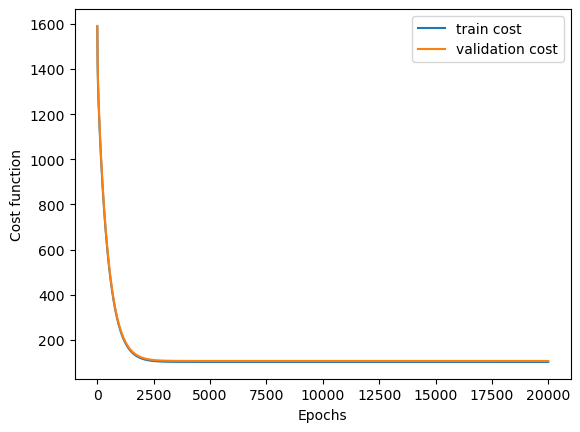

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gqzztuo4 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 2


lr_0.0001_epoch_20000_neur_2
 epochs 0 Train error:  1551.07  validation error:   1568.35
 epochs 2000 Train error:  1097.66  validation error:   1101.96
 epochs 4000 Train error:  816.11  validation error:   815.32
 epochs 6000 Train error:  629.14  validation error:   625.16
 epochs 8000 Train error:  504.23  validation error:   498.08
 epochs 10000 Train error:  420.61  validation error:   412.92
 epochs 12000 Train error:  364.58  validation error:   355.73
 epochs 14000 Train error:  326.98  validation error:   317.26
 epochs 16000 Train error:  301.72  validation error:   291.32
 epochs 18000 Train error:  284.70  validation error:   273.76


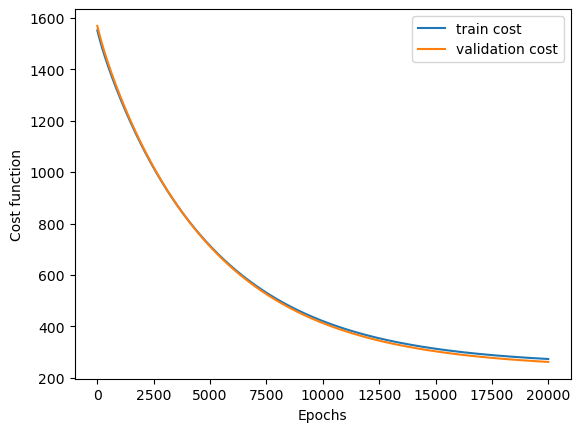

wandb: Agent Starting Run: no3a8tr9 with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 4


lr_0.0001_epoch_20000_neur_4
 epochs 0 Train error:  1555.56  validation error:   1568.46
 epochs 2000 Train error:  1001.01  validation error:   1010.86
 epochs 4000 Train error:  692.94  validation error:   701.15
 epochs 6000 Train error:  488.58  validation error:   496.20
 epochs 8000 Train error:  354.21  validation error:   361.89
 epochs 10000 Train error:  267.21  validation error:   275.22
 epochs 12000 Train error:  211.62  validation error:   219.98
 epochs 14000 Train error:  176.41  validation error:   185.00
 epochs 16000 Train error:  154.19  validation error:   162.85
 epochs 18000 Train error:  140.13  validation error:   148.72


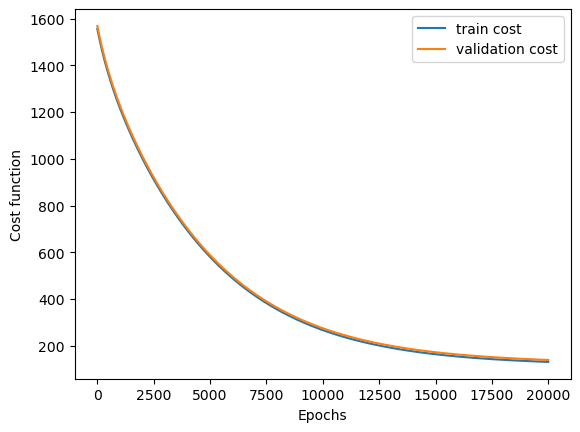

wandb: Agent Starting Run: 06hhphcv with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 8


lr_0.0001_epoch_20000_neur_8
 epochs 0 Train error:  1672.80  validation error:   1666.70
 epochs 2000 Train error:  972.53  validation error:   987.00
 epochs 4000 Train error:  683.51  validation error:   696.44
 epochs 6000 Train error:  492.47  validation error:   503.57
 epochs 8000 Train error:  365.29  validation error:   374.71
 epochs 10000 Train error:  280.55  validation error:   288.52
 epochs 12000 Train error:  224.08  validation error:   230.81
 epochs 14000 Train error:  186.45  validation error:   192.12
 epochs 16000 Train error:  161.37  validation error:   166.13
 epochs 18000 Train error:  144.62  validation error:   148.62


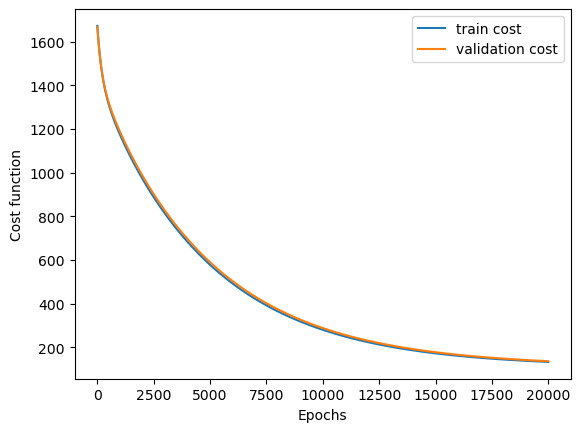

wandb: Agent Starting Run: clanujsw with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 16


lr_0.0001_epoch_20000_neur_16
 epochs 0 Train error:  2043.03  validation error:   2041.10
 epochs 2000 Train error:  965.59  validation error:   974.52
 epochs 4000 Train error:  665.45  validation error:   672.41
 epochs 6000 Train error:  471.49  validation error:   477.37
 epochs 8000 Train error:  343.90  validation error:   348.70
 epochs 10000 Train error:  260.02  validation error:   263.89
 epochs 12000 Train error:  205.09  validation error:   208.23
 epochs 14000 Train error:  169.25  validation error:   171.88
 epochs 16000 Train error:  145.95  validation error:   148.22
 epochs 18000 Train error:  130.83  validation error:   132.88


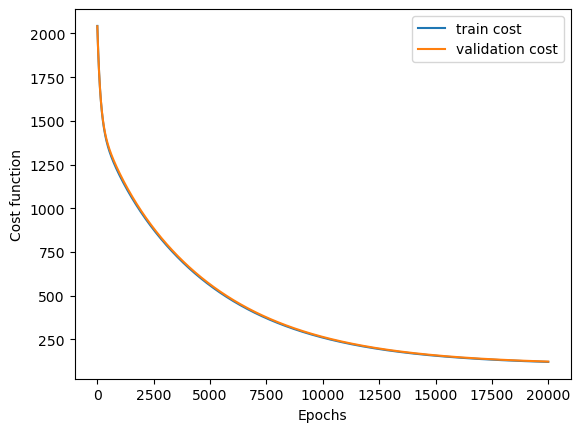

wandb: Agent Starting Run: euzsf7ya with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 32


lr_0.0001_epoch_20000_neur_32
 epochs 0 Train error:  1938.54  validation error:   1976.21
 epochs 2000 Train error:  928.14  validation error:   941.28
 epochs 4000 Train error:  638.58  validation error:   649.49
 epochs 6000 Train error:  448.47  validation error:   457.97
 epochs 8000 Train error:  323.73  validation error:   332.34
 epochs 10000 Train error:  242.55  validation error:   250.54
 epochs 12000 Train error:  190.28  validation error:   197.81
 epochs 14000 Train error:  157.01  validation error:   164.16
 epochs 16000 Train error:  136.05  validation error:   142.89
 epochs 18000 Train error:  122.98  validation error:   129.55


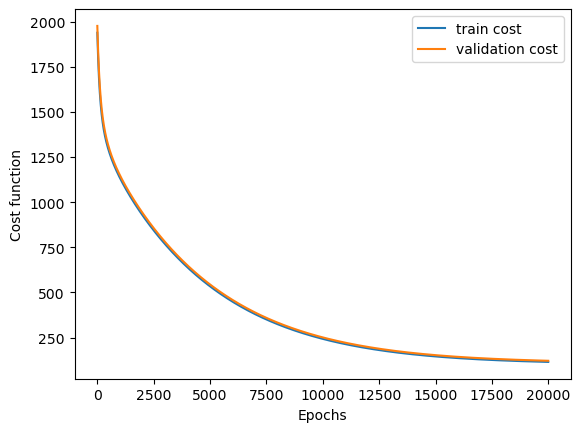

wandb: Agent Starting Run: xa9mxeuq with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 2


lr_1e-05_epoch_20000_neur_2
 epochs 0 Train error:  1551.77  validation error:   1559.05
 epochs 2000 Train error:  1496.95  validation error:   1504.98
 epochs 4000 Train error:  1445.94  validation error:   1454.50
 epochs 6000 Train error:  1398.02  validation error:   1406.94
 epochs 8000 Train error:  1352.69  validation error:   1361.87
 epochs 10000 Train error:  1309.63  validation error:   1318.98
 epochs 12000 Train error:  1268.59  validation error:   1278.03
 epochs 14000 Train error:  1229.38  validation error:   1238.87
 epochs 16000 Train error:  1191.86  validation error:   1201.35
 epochs 18000 Train error:  1155.92  validation error:   1165.39


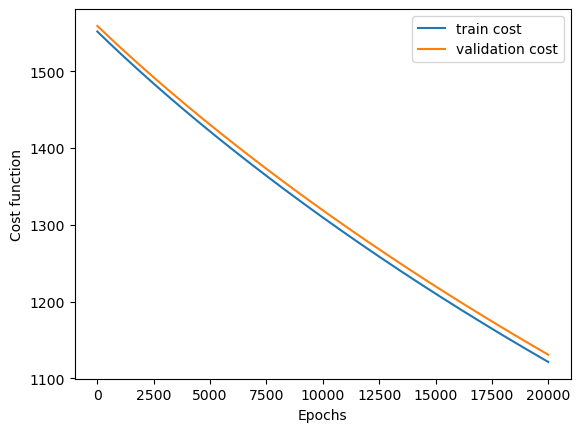

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yyluj9ie with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 4


lr_1e-05_epoch_20000_neur_4
 epochs 0 Train error:  1506.14  validation error:   1528.45
 epochs 2000 Train error:  1436.08  validation error:   1455.48
 epochs 4000 Train error:  1378.06  validation error:   1395.04
 epochs 6000 Train error:  1325.96  validation error:   1341.08
 epochs 8000 Train error:  1277.45  validation error:   1291.16
 epochs 10000 Train error:  1231.55  validation error:   1244.17
 epochs 12000 Train error:  1187.84  validation error:   1199.59
 epochs 14000 Train error:  1146.05  validation error:   1157.08
 epochs 16000 Train error:  1106.03  validation error:   1116.45
 epochs 18000 Train error:  1067.66  validation error:   1077.56


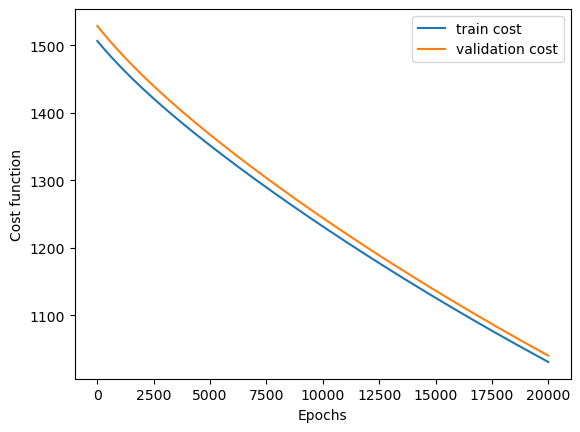

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fq4gpg6c with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 8


lr_1e-05_epoch_20000_neur_8
 epochs 0 Train error:  1555.51  validation error:   1575.03
 epochs 2000 Train error:  1484.99  validation error:   1503.31
 epochs 4000 Train error:  1420.47  validation error:   1437.63
 epochs 6000 Train error:  1360.83  validation error:   1376.90
 epochs 8000 Train error:  1305.26  validation error:   1320.35
 epochs 10000 Train error:  1253.18  validation error:   1267.38
 epochs 12000 Train error:  1204.11  validation error:   1217.54
 epochs 14000 Train error:  1157.73  validation error:   1170.48
 epochs 16000 Train error:  1113.76  validation error:   1125.92
 epochs 18000 Train error:  1071.96  validation error:   1083.63


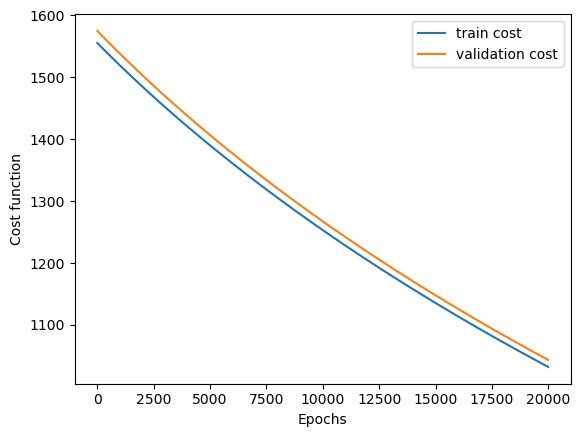

wandb: Agent Starting Run: sde77fnk with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 16


lr_1e-05_epoch_20000_neur_16
 epochs 0 Train error:  1878.89  validation error:   1962.81
 epochs 2000 Train error:  1604.28  validation error:   1652.20
 epochs 4000 Train error:  1447.20  validation error:   1476.93
 epochs 6000 Train error:  1340.13  validation error:   1360.05
 epochs 8000 Train error:  1257.69  validation error:   1272.09
 epochs 10000 Train error:  1189.34  validation error:   1200.56
 epochs 12000 Train error:  1130.14  validation error:   1139.53
 epochs 14000 Train error:  1077.43  validation error:   1085.80
 epochs 16000 Train error:  1029.63  validation error:   1037.46
 epochs 18000 Train error:  985.69  validation error:   993.29


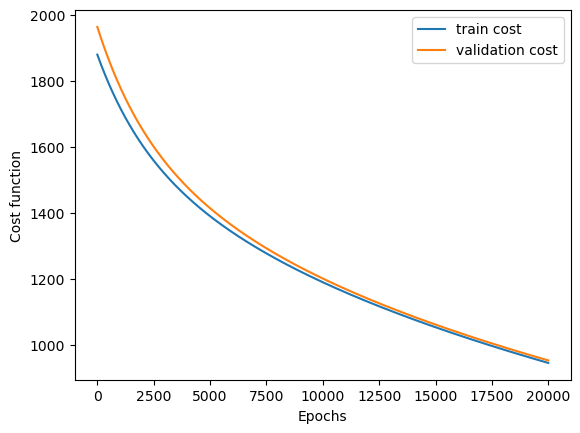

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cnl6sxcf with config:
wandb: 	epochs: 20000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 32


lr_1e-05_epoch_20000_neur_32
 epochs 0 Train error:  1560.90  validation error:   1580.82
 epochs 2000 Train error:  1372.57  validation error:   1391.74
 epochs 4000 Train error:  1293.02  validation error:   1312.29
 epochs 6000 Train error:  1236.12  validation error:   1254.63
 epochs 8000 Train error:  1186.18  validation error:   1203.59
 epochs 10000 Train error:  1139.85  validation error:   1156.15
 epochs 12000 Train error:  1096.18  validation error:   1111.46
 epochs 14000 Train error:  1054.74  validation error:   1069.12
 epochs 16000 Train error:  1015.30  validation error:   1028.89
 epochs 18000 Train error:  977.68  validation error:   990.58


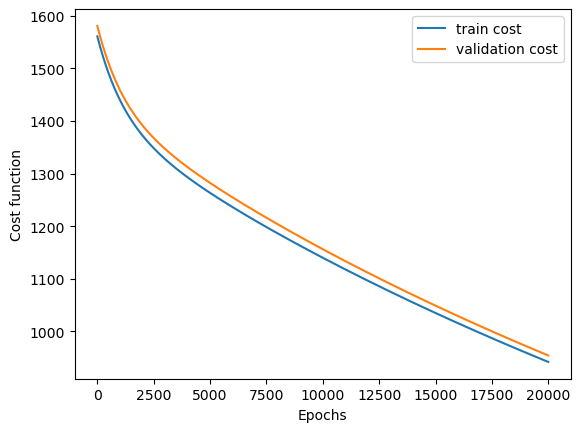

wandb: Agent Starting Run: 4kyavm7v with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 2


lr_0.1_epoch_3000_neur_2
 epochs 0 Train error:  1610.29  validation error:   1293.47
 epochs 300 Train error:  120.38  validation error:   122.55
 epochs 600 Train error:  107.83  validation error:   111.32
 epochs 900 Train error:  105.81  validation error:   108.59
 epochs 1200 Train error:  104.70  validation error:   107.07
 epochs 1500 Train error:  104.02  validation error:   106.21
 epochs 1800 Train error:  103.56  validation error:   105.75
 epochs 2100 Train error:  103.23  validation error:   105.50
 epochs 2400 Train error:  102.97  validation error:   105.39
 epochs 2700 Train error:  102.77  validation error:   105.35


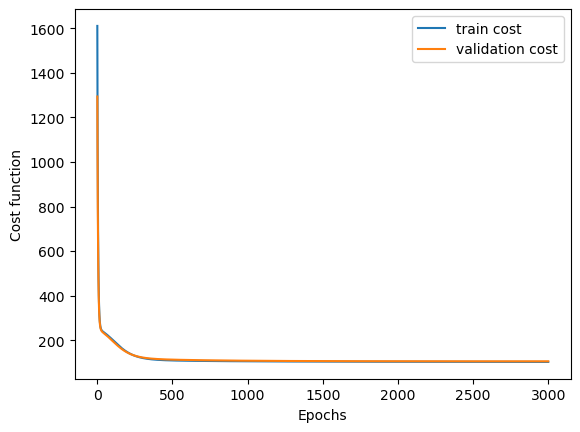

wandb: Agent Starting Run: dgxkxlte with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 4


lr_0.1_epoch_3000_neur_4
 epochs 0 Train error:  1500.65  validation error:   1233.97
 epochs 300 Train error:  136.65  validation error:   147.51
 epochs 600 Train error:  115.51  validation error:   123.60
 epochs 900 Train error:  107.79  validation error:   114.23
 epochs 1200 Train error:  104.24  validation error:   109.63
 epochs 1500 Train error:  102.67  validation error:   107.42
 epochs 1800 Train error:  102.17  validation error:   106.60
 epochs 2100 Train error:  102.06  validation error:   106.36
 epochs 2400 Train error:  102.04  validation error:   106.30
 epochs 2700 Train error:  102.04  validation error:   106.29


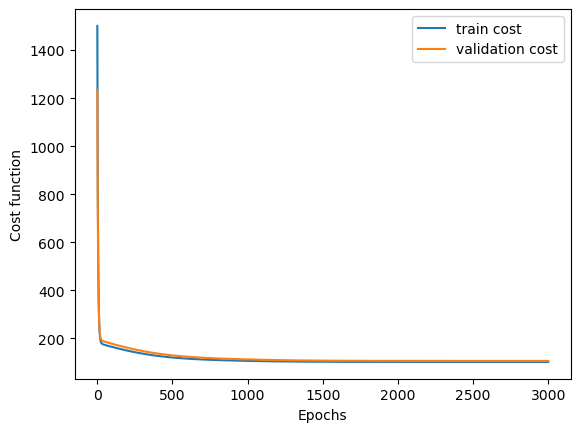

wandb: Agent Starting Run: h123mzva with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 8


lr_0.1_epoch_3000_neur_8
 epochs 0 Train error:  1538.89  validation error:   1286.36
 epochs 300 Train error:  102.05  validation error:   106.54
 epochs 600 Train error:  102.04  validation error:   106.39
 epochs 900 Train error:  102.04  validation error:   106.34
 epochs 1200 Train error:  102.04  validation error:   106.32
 epochs 1500 Train error:  102.04  validation error:   106.32
 epochs 1800 Train error:  102.04  validation error:   106.32
 epochs 2100 Train error:  102.04  validation error:   106.32
 epochs 2400 Train error:  102.04  validation error:   106.32
 epochs 2700 Train error:  102.04  validation error:   106.32


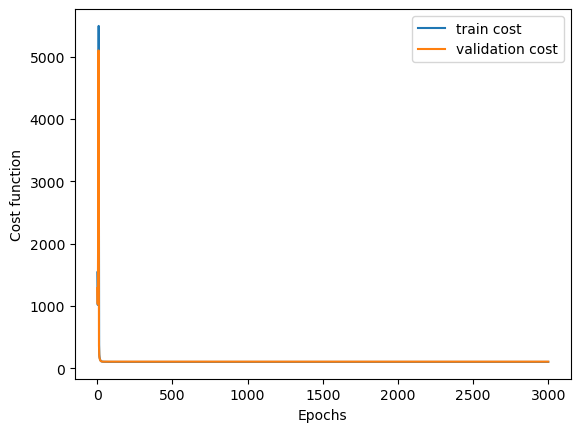

wandb: Agent Starting Run: 71cw97g1 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 16


lr_0.1_epoch_3000_neur_16
 epochs 0 Train error:  1530.71  validation error:   1850.33
 epochs 300 Train error:  nan  validation error:   nan
 epochs 600 Train error:  nan  validation error:   nan
 epochs 900 Train error:  nan  validation error:   nan
 epochs 1200 Train error:  nan  validation error:   nan
 epochs 1500 Train error:  nan  validation error:   nan
 epochs 1800 Train error:  nan  validation error:   nan
 epochs 2100 Train error:  nan  validation error:   nan
 epochs 2400 Train error:  nan  validation error:   nan
 epochs 2700 Train error:  nan  validation error:   nan


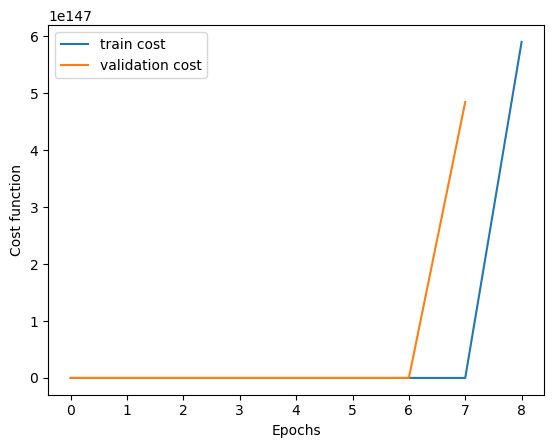

wandb: Agent Starting Run: fq1z6s5h with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.1
wandb: 	num_neurons: 32


lr_0.1_epoch_3000_neur_32
 epochs 0 Train error:  1651.07  validation error:   3095.24
 epochs 300 Train error:  nan  validation error:   nan
 epochs 600 Train error:  nan  validation error:   nan
 epochs 900 Train error:  nan  validation error:   nan
 epochs 1200 Train error:  nan  validation error:   nan
 epochs 1500 Train error:  nan  validation error:   nan
 epochs 1800 Train error:  nan  validation error:   nan
 epochs 2100 Train error:  nan  validation error:   nan
 epochs 2400 Train error:  nan  validation error:   nan
 epochs 2700 Train error:  nan  validation error:   nan


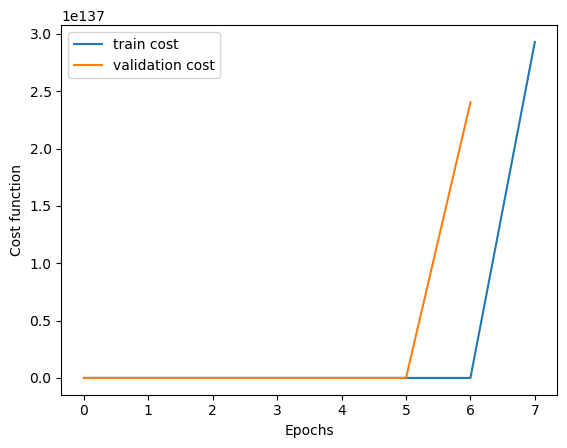

wandb: Agent Starting Run: ofkc8t19 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 2


lr_0.01_epoch_3000_neur_2
 epochs 0 Train error:  1544.73  validation error:   1526.08
 epochs 300 Train error:  248.89  validation error:   248.64
 epochs 600 Train error:  237.11  validation error:   236.41
 epochs 900 Train error:  227.23  validation error:   226.83
 epochs 1200 Train error:  216.82  validation error:   217.09
 epochs 1500 Train error:  206.36  validation error:   207.63
 epochs 1800 Train error:  196.33  validation error:   198.83
 epochs 2100 Train error:  187.07  validation error:   190.91
 epochs 2400 Train error:  178.81  validation error:   183.96
 epochs 2700 Train error:  171.58  validation error:   177.93


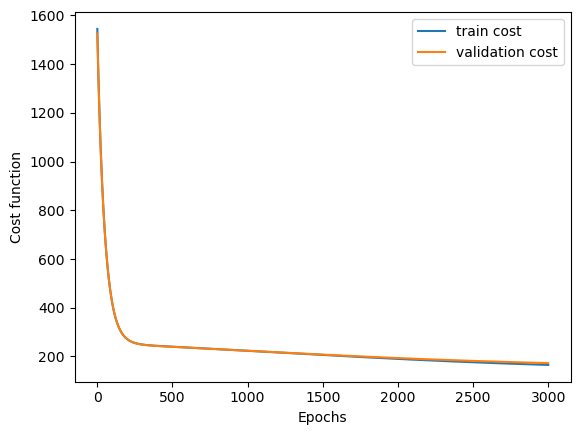

wandb: Agent Starting Run: gk6fb7mt with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 4


lr_0.01_epoch_3000_neur_4
 epochs 0 Train error:  1532.40  validation error:   1514.67
 epochs 300 Train error:  145.83  validation error:   151.34
 epochs 600 Train error:  136.23  validation error:   139.66
 epochs 900 Train error:  130.90  validation error:   133.05
 epochs 1200 Train error:  126.94  validation error:   128.12
 epochs 1500 Train error:  123.99  validation error:   124.41
 epochs 1800 Train error:  121.76  validation error:   121.59
 epochs 2100 Train error:  120.07  validation error:   119.44
 epochs 2400 Train error:  118.76  validation error:   117.77
 epochs 2700 Train error:  117.74  validation error:   116.46


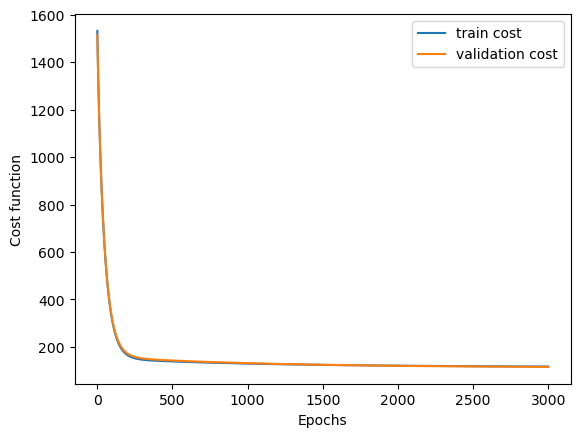

wandb: Agent Starting Run: l0sl816s with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 8


lr_0.01_epoch_3000_neur_8
 epochs 0 Train error:  1558.33  validation error:   1533.13
 epochs 300 Train error:  109.19  validation error:   106.96
 epochs 600 Train error:  106.47  validation error:   105.66
 epochs 900 Train error:  105.40  validation error:   105.28
 epochs 1200 Train error:  104.55  validation error:   105.00
 epochs 1500 Train error:  103.90  validation error:   104.86
 epochs 1800 Train error:  103.39  validation error:   104.82
 epochs 2100 Train error:  103.02  validation error:   104.86
 epochs 2400 Train error:  102.73  validation error:   104.94
 epochs 2700 Train error:  102.53  validation error:   105.06


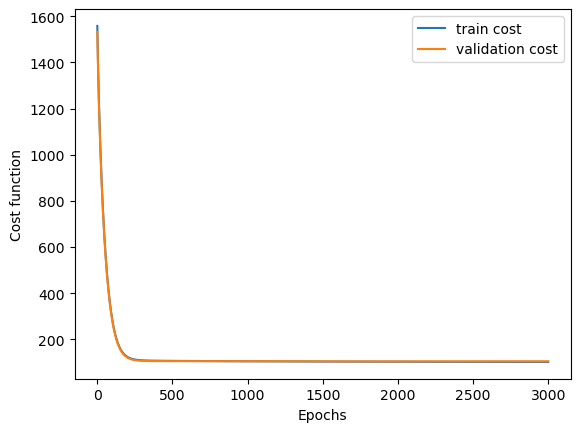

wandb: Agent Starting Run: ewzvqcgp with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 16


lr_0.01_epoch_3000_neur_16
 epochs 0 Train error:  2107.80  validation error:   1707.98
 epochs 300 Train error:  104.74  validation error:   108.32
 epochs 600 Train error:  102.09  validation error:   105.94
 epochs 900 Train error:  102.04  validation error:   106.17
 epochs 1200 Train error:  102.04  validation error:   106.27
 epochs 1500 Train error:  102.04  validation error:   106.30
 epochs 1800 Train error:  102.04  validation error:   106.31
 epochs 2100 Train error:  102.04  validation error:   106.32
 epochs 2400 Train error:  102.04  validation error:   106.32
 epochs 2700 Train error:  102.04  validation error:   106.32


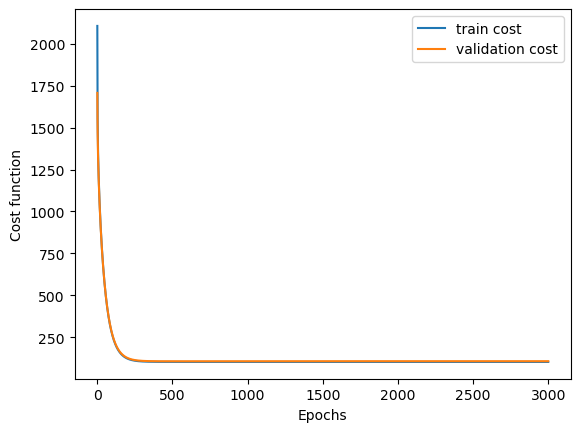

wandb: Agent Starting Run: n3b4aqul with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 32


lr_0.01_epoch_3000_neur_32
 epochs 0 Train error:  1722.10  validation error:   1504.51
 epochs 300 Train error:  103.41  validation error:   108.32
 epochs 600 Train error:  102.04  validation error:   106.44
 epochs 900 Train error:  102.04  validation error:   106.34
 epochs 1200 Train error:  102.04  validation error:   106.32
 epochs 1500 Train error:  102.04  validation error:   106.32
 epochs 1800 Train error:  102.04  validation error:   106.32
 epochs 2100 Train error:  102.04  validation error:   106.32
 epochs 2400 Train error:  102.04  validation error:   106.32
 epochs 2700 Train error:  102.04  validation error:   106.32


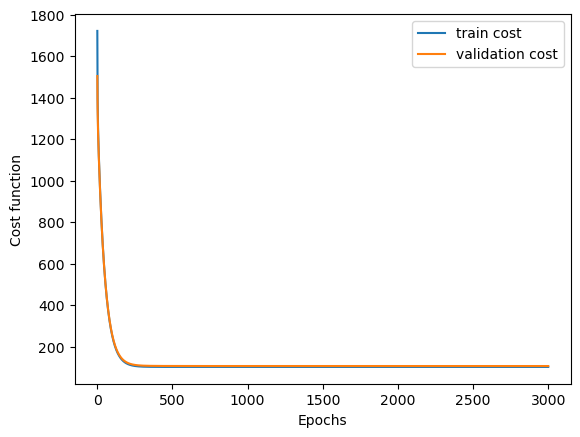

wandb: Agent Starting Run: 4uv7ulfv with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 2


lr_0.001_epoch_3000_neur_2
 epochs 0 Train error:  1536.31  validation error:   1546.45
 epochs 300 Train error:  945.66  validation error:   950.98
 epochs 600 Train error:  623.83  validation error:   629.42
 epochs 900 Train error:  445.23  validation error:   451.33
 epochs 1200 Train error:  346.06  validation error:   352.71
 epochs 1500 Train error:  290.58  validation error:   297.70
 epochs 1800 Train error:  258.80  validation error:   266.29
 epochs 2100 Train error:  239.69  validation error:   247.45
 epochs 2400 Train error:  227.27  validation error:   235.23
 epochs 2700 Train error:  218.36  validation error:   226.45


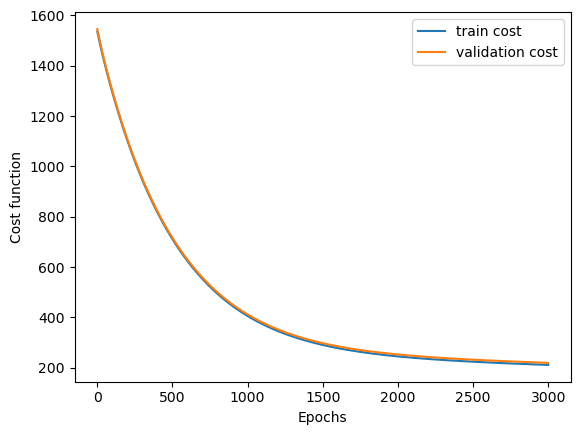

wandb: Agent Starting Run: 7whk4upe with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 4


lr_0.001_epoch_3000_neur_4
 epochs 0 Train error:  1554.29  validation error:   1567.18
 epochs 300 Train error:  950.46  validation error:   955.52
 epochs 600 Train error:  632.89  validation error:   636.38
 epochs 900 Train error:  456.96  validation error:   458.90
 epochs 1200 Train error:  358.43  validation error:   358.84
 epochs 1500 Train error:  302.13  validation error:   301.06
 epochs 1800 Train error:  268.66  validation error:   266.20
 epochs 2100 Train error:  247.31  validation error:   243.54
 epochs 2400 Train error:  232.17  validation error:   227.20
 epochs 2700 Train error:  220.01  validation error:   213.98


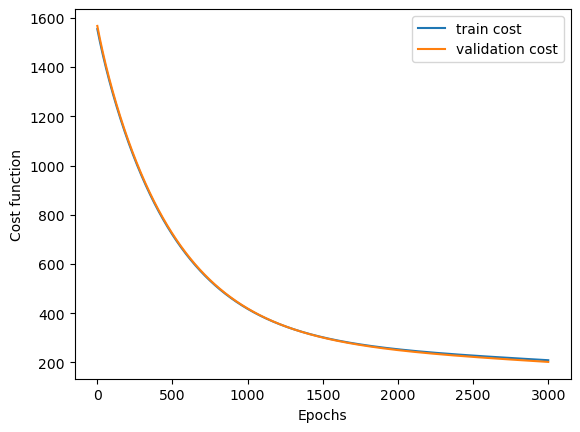

wandb: Agent Starting Run: 1cdjus9u with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 8


lr_0.001_epoch_3000_neur_8
 epochs 0 Train error:  1561.00  validation error:   1545.41
 epochs 300 Train error:  832.98  validation error:   837.75
 epochs 600 Train error:  506.13  validation error:   515.16
 epochs 900 Train error:  331.09  validation error:   340.38
 epochs 1200 Train error:  235.85  validation error:   244.32
 epochs 1500 Train error:  183.55  validation error:   190.97
 epochs 1800 Train error:  154.43  validation error:   160.83
 epochs 2100 Train error:  137.81  validation error:   143.31
 epochs 2400 Train error:  127.96  validation error:   132.70
 epochs 2700 Train error:  121.80  validation error:   125.92


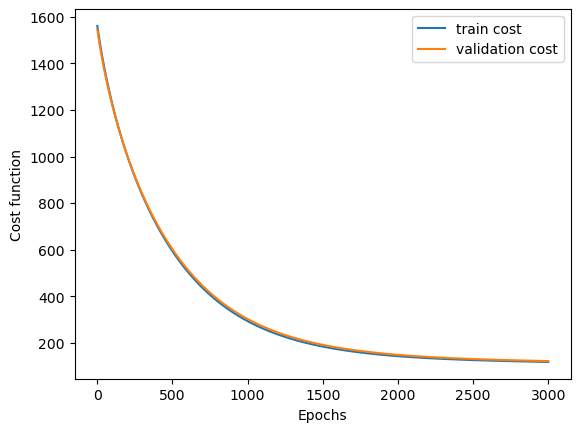

wandb: Agent Starting Run: 9khdig4u with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 16


lr_0.001_epoch_3000_neur_16
 epochs 0 Train error:  1582.30  validation error:   1590.16
 epochs 300 Train error:  799.81  validation error:   808.37
 epochs 600 Train error:  479.34  validation error:   484.71
 epochs 900 Train error:  307.96  validation error:   311.27
 epochs 1200 Train error:  216.13  validation error:   217.95
 epochs 1500 Train error:  166.94  validation error:   167.73
 epochs 1800 Train error:  140.51  validation error:   140.64
 epochs 2100 Train error:  126.17  validation error:   125.92
 epochs 2400 Train error:  118.23  validation error:   117.80
 epochs 2700 Train error:  113.69  validation error:   113.20


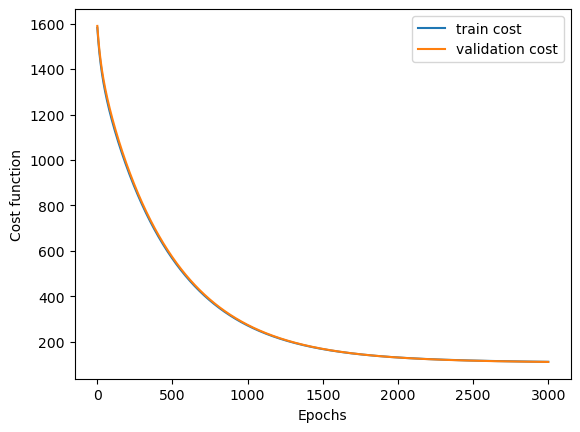

wandb: Agent Starting Run: 89ua6kad with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 32


lr_0.001_epoch_3000_neur_32
 epochs 0 Train error:  1641.37  validation error:   1624.68
 epochs 300 Train error:  768.83  validation error:   779.19
 epochs 600 Train error:  451.47  validation error:   460.17
 epochs 900 Train error:  281.79  validation error:   289.49
 epochs 1200 Train error:  192.64  validation error:   199.59
 epochs 1500 Train error:  146.83  validation error:   153.22
 epochs 1800 Train error:  123.84  validation error:   129.77
 epochs 2100 Train error:  112.52  validation error:   118.10
 epochs 2400 Train error:  107.03  validation error:   112.33
 epochs 2700 Train error:  104.41  validation error:   109.48


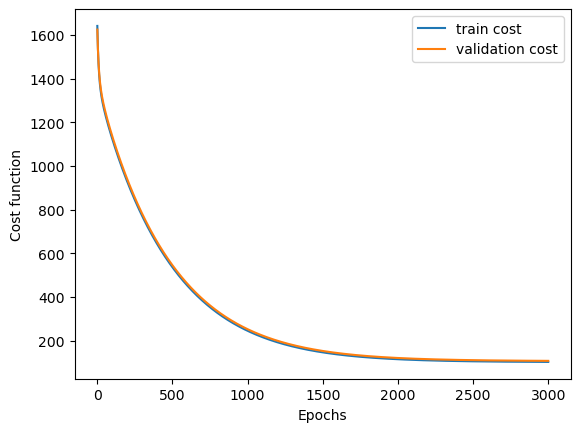

wandb: Agent Starting Run: tf2mkpve with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 2


lr_0.0001_epoch_3000_neur_2
 epochs 0 Train error:  1603.49  validation error:   1622.78
 epochs 300 Train error:  1448.23  validation error:   1459.07
 epochs 600 Train error:  1330.61  validation error:   1337.55
 epochs 900 Train error:  1236.34  validation error:   1241.81
 epochs 1200 Train error:  1157.11  validation error:   1162.34
 epochs 1500 Train error:  1088.05  validation error:   1093.63
 epochs 1800 Train error:  1026.27  validation error:   1032.43
 epochs 2100 Train error:  969.99  validation error:   976.80
 epochs 2400 Train error:  918.13  validation error:   925.56
 epochs 2700 Train error:  869.98  validation error:   877.97


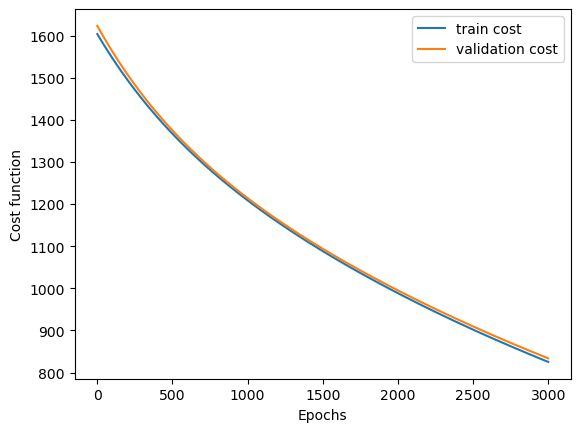

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 2lyupyl8 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 4


lr_0.0001_epoch_3000_neur_4
 epochs 0 Train error:  1530.49  validation error:   1527.87
 epochs 300 Train error:  1395.61  validation error:   1399.57
 epochs 600 Train error:  1296.94  validation error:   1305.73
 epochs 900 Train error:  1217.11  validation error:   1229.22
 epochs 1200 Train error:  1148.05  validation error:   1162.32
 epochs 1500 Train error:  1085.90  validation error:   1101.50
 epochs 1800 Train error:  1028.78  validation error:   1045.13
 epochs 2100 Train error:  975.68  validation error:   992.38
 epochs 2400 Train error:  926.03  validation error:   942.82
 epochs 2700 Train error:  879.47  validation error:   896.17


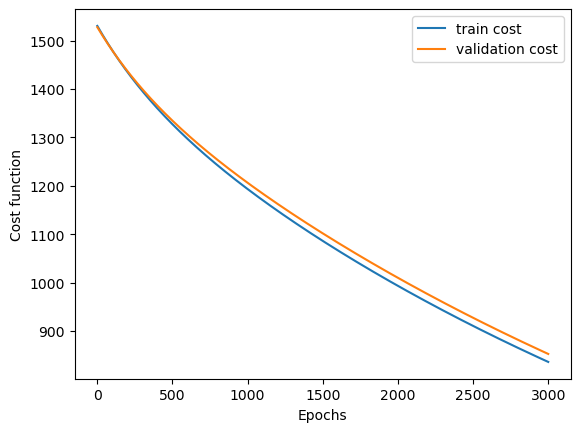

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: le6933o0 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 8


lr_0.0001_epoch_3000_neur_8
 epochs 0 Train error:  1514.70  validation error:   1523.94
 epochs 300 Train error:  1379.39  validation error:   1393.29
 epochs 600 Train error:  1280.63  validation error:   1295.09
 epochs 900 Train error:  1198.56  validation error:   1212.26
 epochs 1200 Train error:  1126.43  validation error:   1139.03
 epochs 1500 Train error:  1061.26  validation error:   1072.81
 epochs 1800 Train error:  1001.48  validation error:   1012.14
 epochs 2100 Train error:  946.15  validation error:   956.08
 epochs 2400 Train error:  894.66  validation error:   904.02
 epochs 2700 Train error:  846.59  validation error:   855.49


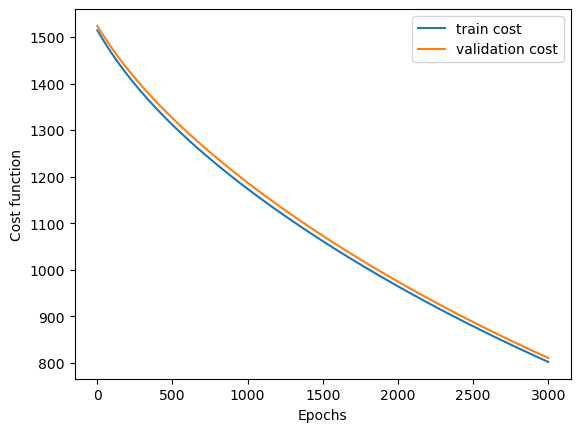

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 37bwuen6 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 16


lr_0.0001_epoch_3000_neur_16
 epochs 0 Train error:  1671.14  validation error:   1686.97
 epochs 300 Train error:  1395.93  validation error:   1409.06
 epochs 600 Train error:  1282.20  validation error:   1298.13
 epochs 900 Train error:  1196.63  validation error:   1213.30
 epochs 1200 Train error:  1122.77  validation error:   1139.29
 epochs 1500 Train error:  1056.37  validation error:   1072.49
 epochs 1800 Train error:  995.56  validation error:   1011.28
 epochs 2100 Train error:  939.33  validation error:   954.68
 epochs 2400 Train error:  887.03  validation error:   902.04
 epochs 2700 Train error:  838.22  validation error:   852.91


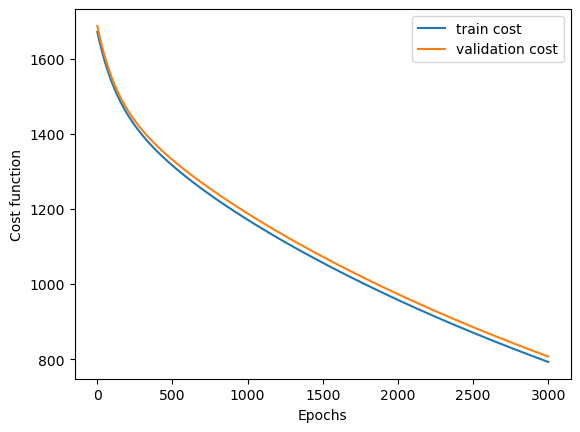

wandb: Agent Starting Run: r5k2cug1 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 32


lr_0.0001_epoch_3000_neur_32
 epochs 0 Train error:  1504.32  validation error:   1534.90
 epochs 300 Train error:  1300.93  validation error:   1320.57
 epochs 600 Train error:  1216.54  validation error:   1234.94
 epochs 900 Train error:  1145.95  validation error:   1163.79
 epochs 1200 Train error:  1081.27  validation error:   1098.62
 epochs 1500 Train error:  1020.91  validation error:   1037.78
 epochs 1800 Train error:  964.36  validation error:   980.76
 epochs 2100 Train error:  911.31  validation error:   927.26
 epochs 2400 Train error:  861.51  validation error:   877.05
 epochs 2700 Train error:  814.75  validation error:   829.91


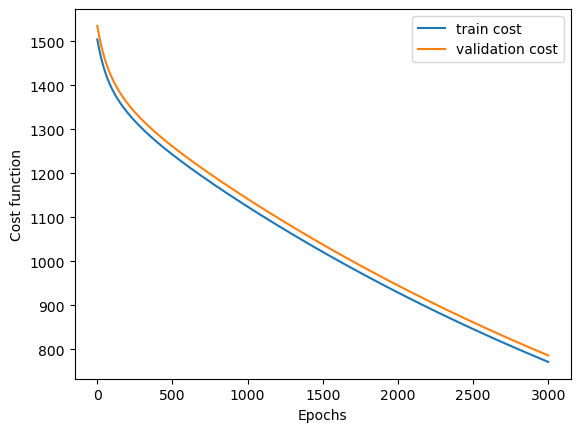

wandb: Agent Starting Run: v2jv41ol with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 2


lr_1e-05_epoch_3000_neur_2
 epochs 0 Train error:  1530.93  validation error:   1548.93
 epochs 300 Train error:  1523.17  validation error:   1541.10
 epochs 600 Train error:  1515.48  validation error:   1533.34
 epochs 900 Train error:  1507.84  validation error:   1525.63
 epochs 1200 Train error:  1500.25  validation error:   1517.98
 epochs 1500 Train error:  1492.72  validation error:   1510.38
 epochs 1800 Train error:  1485.25  validation error:   1502.84
 epochs 2100 Train error:  1477.82  validation error:   1495.35
 epochs 2400 Train error:  1470.45  validation error:   1487.92
 epochs 2700 Train error:  1463.13  validation error:   1480.54


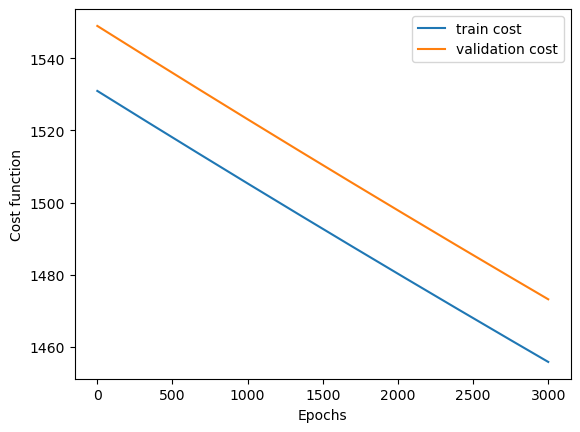

wandb: Agent Starting Run: rhy3tiec with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 4


lr_1e-05_epoch_3000_neur_4
 epochs 0 Train error:  1649.65  validation error:   1663.03
 epochs 300 Train error:  1629.69  validation error:   1642.67
 epochs 600 Train error:  1611.10  validation error:   1623.72
 epochs 900 Train error:  1593.72  validation error:   1606.00
 epochs 1200 Train error:  1577.39  validation error:   1589.36
 epochs 1500 Train error:  1561.97  validation error:   1573.67
 epochs 1800 Train error:  1547.37  validation error:   1558.81
 epochs 2100 Train error:  1533.47  validation error:   1544.67
 epochs 2400 Train error:  1520.19  validation error:   1531.17
 epochs 2700 Train error:  1507.47  validation error:   1518.25


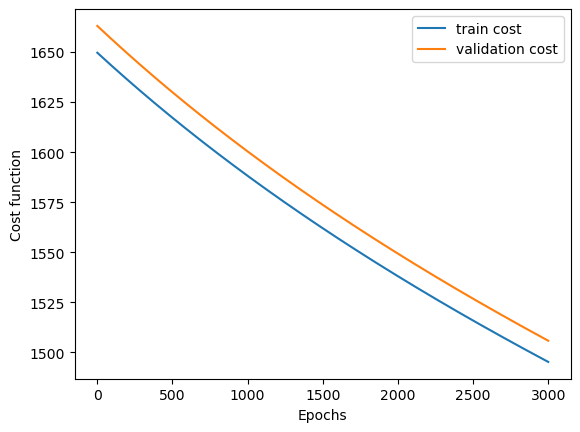

wandb: Agent Starting Run: hgfrmak5 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 8


lr_1e-05_epoch_3000_neur_8
 epochs 0 Train error:  1642.82  validation error:   1661.41
 epochs 300 Train error:  1619.04  validation error:   1636.34
 epochs 600 Train error:  1596.84  validation error:   1613.01
 epochs 900 Train error:  1576.07  validation error:   1591.23
 epochs 1200 Train error:  1556.58  validation error:   1570.85
 epochs 1500 Train error:  1538.24  validation error:   1551.74
 epochs 1800 Train error:  1520.95  validation error:   1533.77
 epochs 2100 Train error:  1504.61  validation error:   1516.83
 epochs 2400 Train error:  1489.11  validation error:   1500.81
 epochs 2700 Train error:  1474.39  validation error:   1485.63


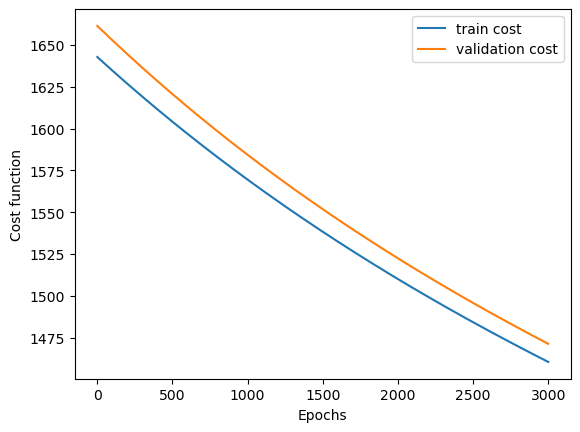

wandb: Agent Starting Run: uk3fy6c7 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 16


lr_1e-05_epoch_3000_neur_16
 epochs 0 Train error:  1988.21  validation error:   1847.83
 epochs 300 Train error:  1884.80  validation error:   1768.59
 epochs 600 Train error:  1800.13  validation error:   1703.89
 epochs 900 Train error:  1730.40  validation error:   1650.69
 epochs 1200 Train error:  1672.58  validation error:   1606.59
 epochs 1500 Train error:  1624.27  validation error:   1569.70
 epochs 1800 Train error:  1583.55  validation error:   1538.52
 epochs 2100 Train error:  1548.92  validation error:   1511.86
 epochs 2400 Train error:  1519.16  validation error:   1488.79
 epochs 2700 Train error:  1493.30  validation error:   1468.56


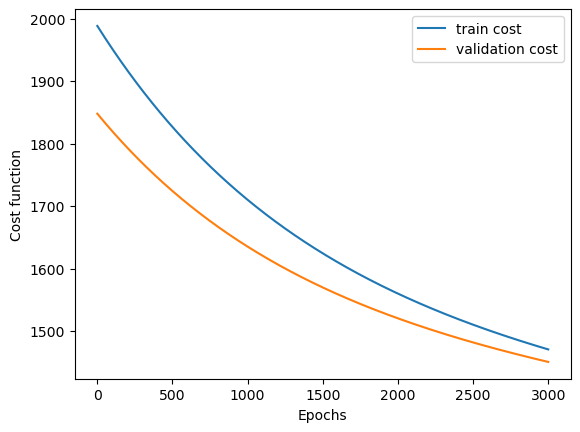

wandb: Agent Starting Run: y0335xqp with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 1e-05
wandb: 	num_neurons: 32


lr_1e-05_epoch_3000_neur_32
 epochs 0 Train error:  2039.75  validation error:   2186.07
 epochs 300 Train error:  1916.86  validation error:   2041.45
 epochs 600 Train error:  1816.70  validation error:   1923.10
 epochs 900 Train error:  1734.45  validation error:   1825.60
 epochs 1200 Train error:  1666.34  validation error:   1744.70
 epochs 1500 Train error:  1609.46  validation error:   1677.08
 epochs 1800 Train error:  1561.51  validation error:   1620.10
 epochs 2100 Train error:  1520.70  validation error:   1571.69
 epochs 2400 Train error:  1485.62  validation error:   1530.22
 epochs 2700 Train error:  1455.16  validation error:   1494.37


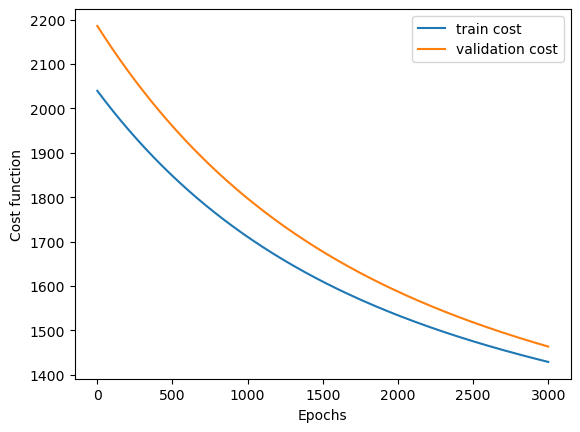

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [86]:
sweep_config = {
  "name": "hyperparameter optimization",
  "metric": {
      "name":"cost_validation",
      "goal": "minimize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.1,0.01,0.001, 0.0001,0.00001]
        },
        "epochs": {
            "values": [1000,2000,3000]
        },
        "num_neurons": {
            "values": [2,4,8,16,32]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="ID5030_ML_HW05")
wandb.agent(sweep_id, model_optimization)

Based on the above WANDB sweep results, the best hyperparameter configuration is:-
learning_rate=0.001<br>
neurons=8<br>
epochs=2000<br>
Now, a concentrated sweep could be performed based on the above values:-

Create sweep with ID: 7119c1f7
Sweep URL: https://wandb.ai/ananthu2014/ID5030_ML_HW05/sweeps/7119c1f7


wandb: Agent Starting Run: z3ug5cnd with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 8


lr_0.01_epoch_3000_neur_8
 epochs 0 Train error:  1545.00  validation error:   1491.53
 epochs 300 Train error:  109.21  validation error:   108.76
 epochs 600 Train error:  104.43  validation error:   105.46
 epochs 900 Train error:  103.70  validation error:   105.75
 epochs 1200 Train error:  103.31  validation error:   105.86
 epochs 1500 Train error:  103.01  validation error:   105.86
 epochs 1800 Train error:  102.77  validation error:   105.83
 epochs 2100 Train error:  102.58  validation error:   105.81
 epochs 2400 Train error:  102.44  validation error:   105.81
 epochs 2700 Train error:  102.33  validation error:   105.83


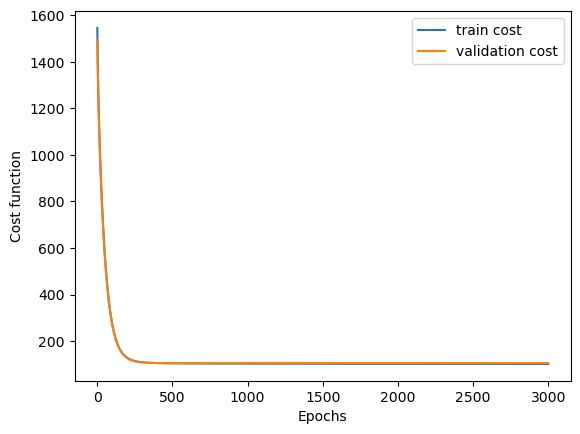

wandb: Agent Starting Run: rzboxa1t with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 16


lr_0.01_epoch_3000_neur_16
 epochs 0 Train error:  1567.97  validation error:   1485.26
 epochs 300 Train error:  110.78  validation error:   110.21
 epochs 600 Train error:  105.44  validation error:   105.80
 epochs 900 Train error:  103.73  validation error:   105.09
 epochs 1200 Train error:  102.87  validation error:   105.03
 epochs 1500 Train error:  102.44  validation error:   105.21
 epochs 1800 Train error:  102.23  validation error:   105.45
 epochs 2100 Train error:  102.13  validation error:   105.67
 epochs 2400 Train error:  102.08  validation error:   105.85
 epochs 2700 Train error:  102.06  validation error:   105.99


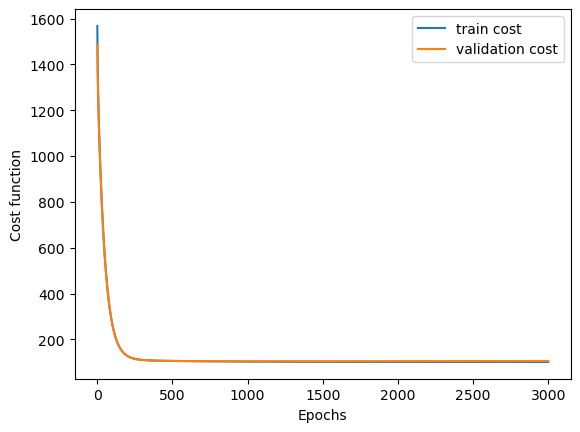

wandb: Agent Starting Run: cssm0lxj with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 32


lr_0.01_epoch_3000_neur_32
 epochs 0 Train error:  1995.02  validation error:   1687.07
 epochs 300 Train error:  103.07  validation error:   107.37
 epochs 600 Train error:  102.04  validation error:   106.30
 epochs 900 Train error:  102.04  validation error:   106.32
 epochs 1200 Train error:  102.04  validation error:   106.32
 epochs 1500 Train error:  102.04  validation error:   106.32
 epochs 1800 Train error:  102.04  validation error:   106.32
 epochs 2100 Train error:  102.04  validation error:   106.32
 epochs 2400 Train error:  102.04  validation error:   106.32
 epochs 2700 Train error:  102.04  validation error:   106.32


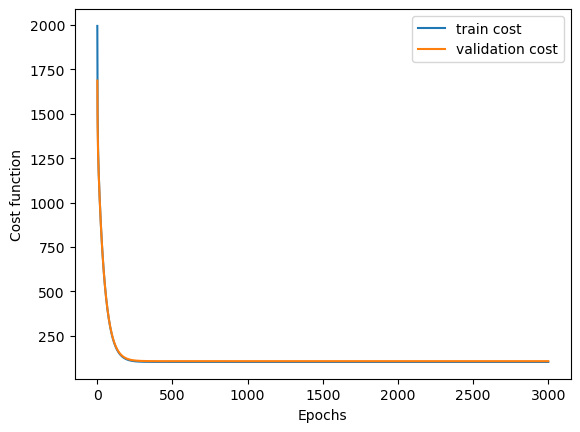

wandb: Agent Starting Run: qdup3mz5 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 8


lr_0.001_epoch_3000_neur_8
 epochs 0 Train error:  1569.03  validation error:   1581.67
 epochs 300 Train error:  799.14  validation error:   808.92
 epochs 600 Train error:  465.71  validation error:   476.06
 epochs 900 Train error:  293.05  validation error:   302.95
 epochs 1200 Train error:  202.87  validation error:   211.81
 epochs 1500 Train error:  155.76  validation error:   163.66
 epochs 1800 Train error:  131.15  validation error:   138.09
 epochs 2100 Train error:  118.24  validation error:   124.40
 epochs 2400 Train error:  111.42  validation error:   116.95
 epochs 2700 Train error:  107.77  validation error:   112.81


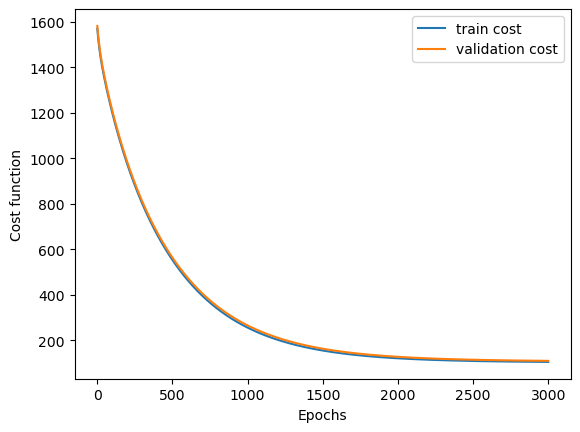

wandb: Agent Starting Run: q3sboww4 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 16


lr_0.001_epoch_3000_neur_16
 epochs 0 Train error:  1486.26  validation error:   1516.31
 epochs 300 Train error:  782.46  validation error:   793.14
 epochs 600 Train error:  464.11  validation error:   472.88
 epochs 900 Train error:  293.28  validation error:   300.24
 epochs 1200 Train error:  202.26  validation error:   207.76
 epochs 1500 Train error:  154.36  validation error:   158.76
 epochs 1800 Train error:  129.44  validation error:   133.06
 epochs 2100 Train error:  116.57  validation error:   119.68
 epochs 2400 Train error:  109.96  validation error:   112.73
 epochs 2700 Train error:  106.54  validation error:   109.13


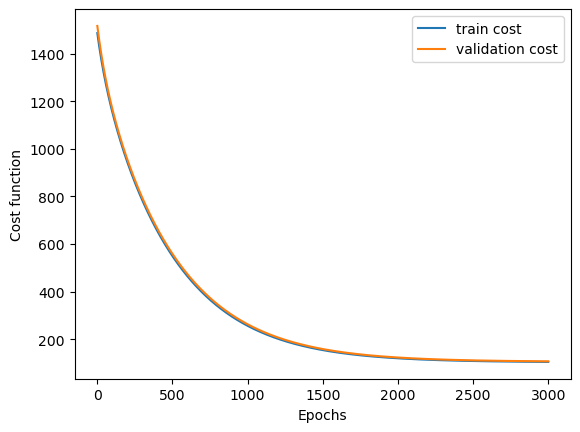

wandb: Agent Starting Run: rel8nh7r with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 32


lr_0.001_epoch_3000_neur_32
 epochs 0 Train error:  1782.24  validation error:   1758.19
 epochs 300 Train error:  781.98  validation error:   789.69
 epochs 600 Train error:  464.35  validation error:   470.63
 epochs 900 Train error:  292.64  validation error:   297.89
 epochs 1200 Train error:  200.83  validation error:   205.39
 epochs 1500 Train error:  152.49  validation error:   156.64
 epochs 1800 Train error:  127.48  validation error:   131.40
 epochs 2100 Train error:  114.74  validation error:   118.55
 epochs 2400 Train error:  108.34  validation error:   112.11
 epochs 2700 Train error:  105.15  validation error:   108.93


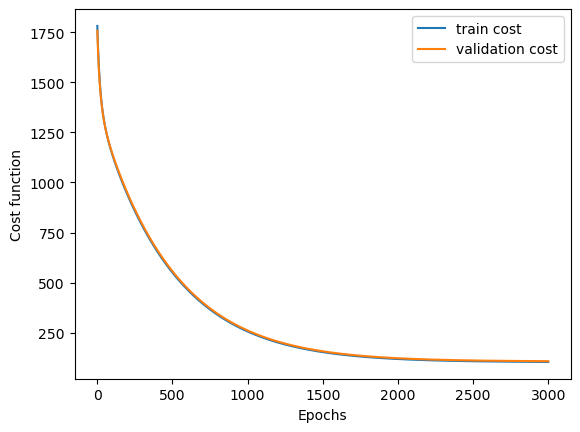

wandb: Agent Starting Run: o9qlik11 with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 8


lr_0.0001_epoch_3000_neur_8
 epochs 0 Train error:  1522.55  validation error:   1525.23
 epochs 300 Train error:  1400.54  validation error:   1405.66
 epochs 600 Train error:  1305.70  validation error:   1312.47
 epochs 900 Train error:  1224.78  validation error:   1232.66
 epochs 1200 Train error:  1152.74  validation error:   1161.33
 epochs 1500 Train error:  1087.12  validation error:   1096.13
 epochs 1800 Train error:  1026.55  validation error:   1035.76
 epochs 2100 Train error:  970.17  validation error:   979.44
 epochs 2400 Train error:  917.46  validation error:   926.65
 epochs 2700 Train error:  868.01  validation error:   877.06


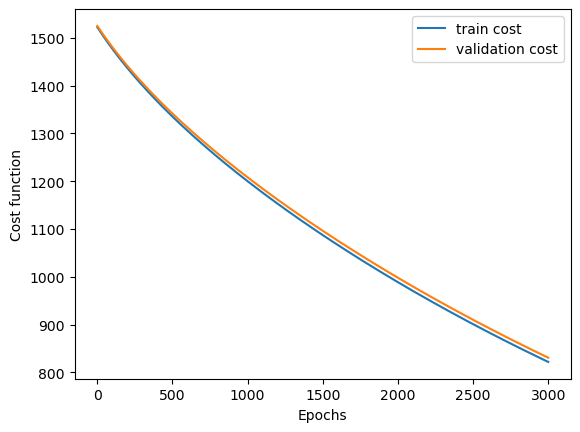

wandb: Agent Starting Run: e6hujflz with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 16


lr_0.0001_epoch_3000_neur_16
 epochs 0 Train error:  1530.22  validation error:   1559.30
 epochs 300 Train error:  1395.18  validation error:   1417.47
 epochs 600 Train error:  1302.97  validation error:   1323.30
 epochs 900 Train error:  1223.38  validation error:   1242.43
 epochs 1200 Train error:  1151.25  validation error:   1169.22
 epochs 1500 Train error:  1084.72  validation error:   1101.74
 epochs 1800 Train error:  1022.88  validation error:   1039.08
 epochs 2100 Train error:  965.18  validation error:   980.66
 epochs 2400 Train error:  911.22  validation error:   926.06
 epochs 2700 Train error:  860.70  validation error:   874.97


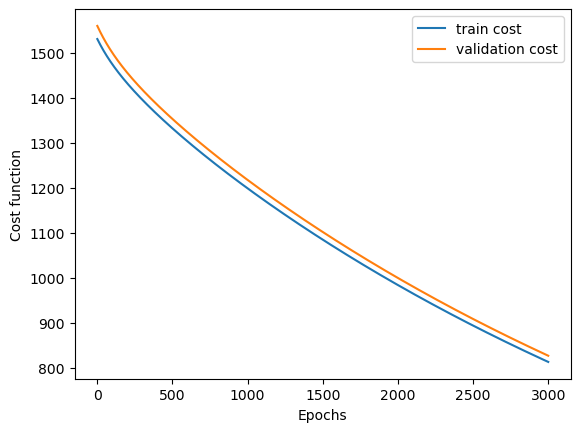

wandb: Agent Starting Run: rqp51ctu with config:
wandb: 	epochs: 3000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 32


lr_0.0001_epoch_3000_neur_32
 epochs 0 Train error:  1915.04  validation error:   1992.41
 epochs 300 Train error:  1319.06  validation error:   1328.46
 epochs 600 Train error:  1213.64  validation error:   1224.35
 epochs 900 Train error:  1142.52  validation error:   1155.20
 epochs 1200 Train error:  1078.82  validation error:   1092.17
 epochs 1500 Train error:  1019.45  validation error:   1032.87
 epochs 1800 Train error:  963.76  validation error:   977.04
 epochs 2100 Train error:  911.44  validation error:   924.51
 epochs 2400 Train error:  862.28  validation error:   875.10
 epochs 2700 Train error:  816.05  validation error:   828.63


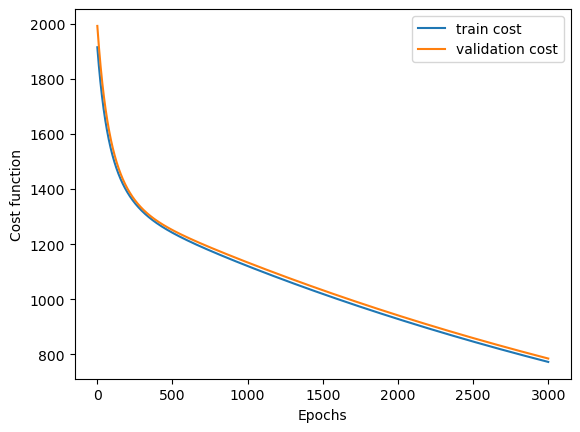

wandb: Agent Starting Run: nuvoclij with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 8


lr_0.01_epoch_5000_neur_8
 epochs 0 Train error:  1778.88  validation error:   1643.27
 epochs 500 Train error:  107.83  validation error:   110.24
 epochs 1000 Train error:  104.73  validation error:   105.99
 epochs 1500 Train error:  104.17  validation error:   105.36
 epochs 2000 Train error:  103.92  validation error:   105.22
 epochs 2500 Train error:  103.73  validation error:   105.16
 epochs 3000 Train error:  103.55  validation error:   105.12
 epochs 3500 Train error:  103.39  validation error:   105.10
 epochs 4000 Train error:  103.24  validation error:   105.09
 epochs 4500 Train error:  103.11  validation error:   105.08


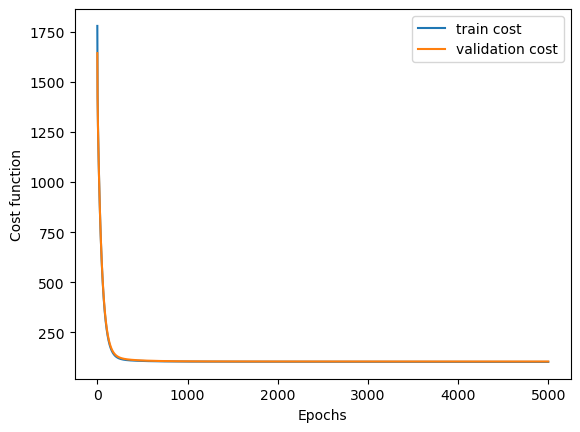

wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1sgqcabx with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 16


lr_0.01_epoch_5000_neur_16
 epochs 0 Train error:  1575.16  validation error:   1514.05
 epochs 500 Train error:  102.17  validation error:   105.78
 epochs 1000 Train error:  102.05  validation error:   106.11
 epochs 1500 Train error:  102.04  validation error:   106.25
 epochs 2000 Train error:  102.04  validation error:   106.30
 epochs 2500 Train error:  102.04  validation error:   106.31
 epochs 3000 Train error:  102.04  validation error:   106.32
 epochs 3500 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 4500 Train error:  102.04  validation error:   106.32


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: e8kwfgo9 with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 32


lr_0.01_epoch_5000_neur_32
 epochs 0 Train error:  1774.34  validation error:   1454.95
 epochs 500 Train error:  102.07  validation error:   106.04
 epochs 1000 Train error:  102.04  validation error:   106.31
 epochs 1500 Train error:  102.04  validation error:   106.32
 epochs 2000 Train error:  102.04  validation error:   106.32
 epochs 2500 Train error:  102.04  validation error:   106.32
 epochs 3000 Train error:  102.04  validation error:   106.32
 epochs 3500 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 4500 Train error:  102.04  validation error:   106.32


wandb: Agent Starting Run: ongle0yx with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 8


lr_0.001_epoch_5000_neur_8
 epochs 0 Train error:  1535.52  validation error:   1539.66
 epochs 500 Train error:  561.21  validation error:   580.27
 epochs 1000 Train error:  267.38  validation error:   284.21
 epochs 1500 Train error:  163.89  validation error:   178.46
 epochs 2000 Train error:  127.77  validation error:   140.59
 epochs 2500 Train error:  114.99  validation error:   126.51
 epochs 3000 Train error:  110.16  validation error:   120.73
 epochs 3500 Train error:  108.04  validation error:   117.90
 epochs 4000 Train error:  106.87  validation error:   116.18
 epochs 4500 Train error:  106.09  validation error:   114.94


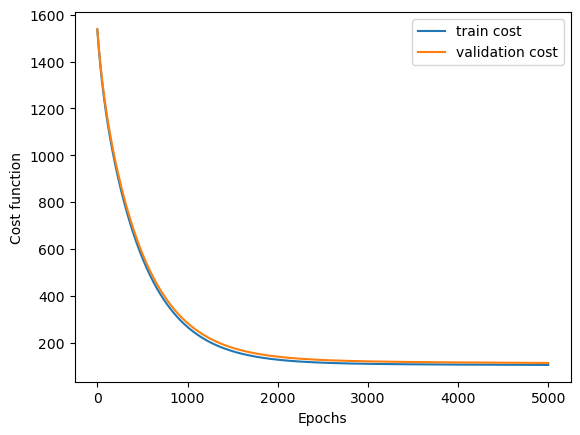

wandb: Agent Starting Run: gagbaxnq with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 16


lr_0.001_epoch_5000_neur_16
 epochs 0 Train error:  1553.76  validation error:   1584.25
 epochs 500 Train error:  540.10  validation error:   550.04
 epochs 1000 Train error:  250.07  validation error:   257.80
 epochs 1500 Train error:  150.78  validation error:   156.90
 epochs 2000 Train error:  117.89  validation error:   122.94
 epochs 2500 Train error:  107.25  validation error:   111.68
 epochs 3000 Train error:  103.83  validation error:   107.91
 epochs 3500 Train error:  102.71  validation error:   106.62
 epochs 4000 Train error:  102.33  validation error:   106.16
 epochs 4500 Train error:  102.18  validation error:   106.00


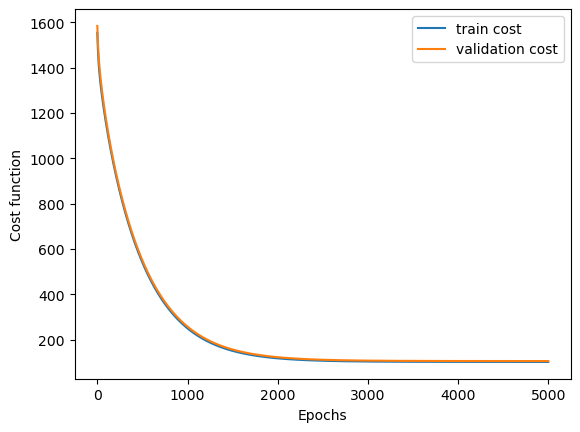

wandb: Agent Starting Run: yp69ooe4 with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 32


lr_0.001_epoch_5000_neur_32
 epochs 0 Train error:  2075.54  validation error:   1969.56
 epochs 500 Train error:  532.34  validation error:   542.34
 epochs 1000 Train error:  241.33  validation error:   249.20
 epochs 1500 Train error:  144.70  validation error:   151.26
 epochs 2000 Train error:  114.55  validation error:   120.24
 epochs 2500 Train error:  105.60  validation error:   110.74
 epochs 3000 Train error:  103.04  validation error:   107.84
 epochs 3500 Train error:  102.32  validation error:   106.91
 epochs 4000 Train error:  102.11  validation error:   106.59
 epochs 4500 Train error:  102.06  validation error:   106.46


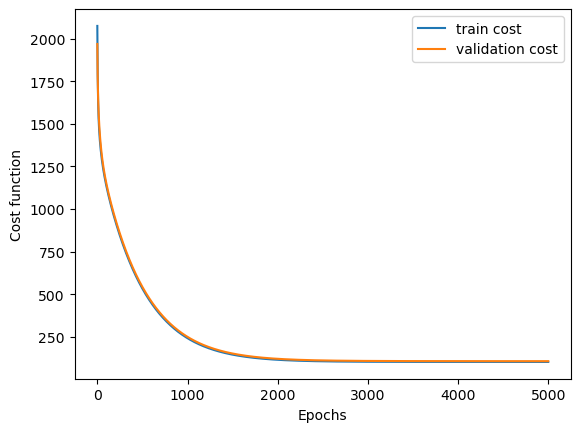

wandb: Agent Starting Run: cl2xspah with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 8


lr_0.0001_epoch_5000_neur_8
 epochs 0 Train error:  1591.35  validation error:   1595.01
 epochs 500 Train error:  1335.72  validation error:   1345.55
 epochs 1000 Train error:  1180.01  validation error:   1189.05
 epochs 1500 Train error:  1061.15  validation error:   1069.47
 epochs 2000 Train error:  961.89  validation error:   969.77
 epochs 2500 Train error:  875.43  validation error:   883.00
 epochs 3000 Train error:  798.67  validation error:   805.97
 epochs 3500 Train error:  729.92  validation error:   736.98
 epochs 4000 Train error:  668.14  validation error:   674.96
 epochs 4500 Train error:  612.52  validation error:   619.11


wandb: Agent Starting Run: z91rj40i with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 16


lr_0.0001_epoch_5000_neur_16
 epochs 0 Train error:  1567.32  validation error:   1581.33
 epochs 500 Train error:  1309.96  validation error:   1320.63
 epochs 1000 Train error:  1167.81  validation error:   1177.66
 epochs 1500 Train error:  1051.53  validation error:   1061.54
 epochs 2000 Train error:  950.98  validation error:   961.09
 epochs 2500 Train error:  862.60  validation error:   872.69
 epochs 3000 Train error:  784.28  validation error:   794.25
 epochs 3500 Train error:  714.51  validation error:   724.31
 epochs 4000 Train error:  652.14  validation error:   661.72
 epochs 4500 Train error:  596.25  validation error:   605.60


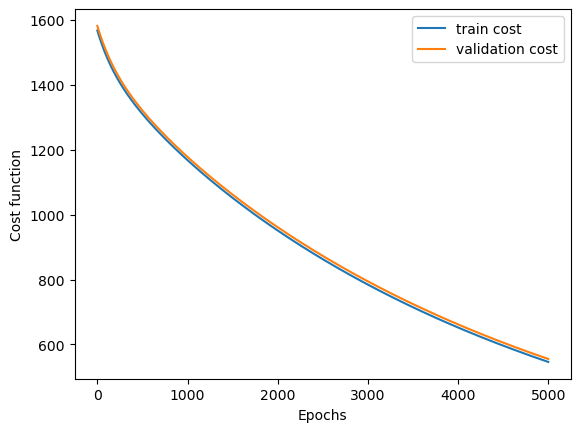

wandb: Agent Starting Run: sitowhro with config:
wandb: 	epochs: 5000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 32


lr_0.0001_epoch_5000_neur_32
 epochs 0 Train error:  1498.63  validation error:   1508.94
 epochs 500 Train error:  1245.70  validation error:   1259.82
 epochs 1000 Train error:  1124.29  validation error:   1137.43
 epochs 1500 Train error:  1020.63  validation error:   1032.87
 epochs 2000 Train error:  927.92  validation error:   939.39
 epochs 2500 Train error:  844.57  validation error:   855.38
 epochs 3000 Train error:  769.54  validation error:   779.78
 epochs 3500 Train error:  701.95  validation error:   711.70
 epochs 4000 Train error:  641.06  validation error:   650.36
 epochs 4500 Train error:  586.18  validation error:   595.09


wandb: Agent Starting Run: ew41pgos with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 8


lr_0.01_epoch_10000_neur_8
 epochs 0 Train error:  1513.46  validation error:   1500.10
 epochs 1000 Train error:  104.01  validation error:   106.80
 epochs 2000 Train error:  102.37  validation error:   105.94
 epochs 3000 Train error:  102.09  validation error:   106.08
 epochs 4000 Train error:  102.04  validation error:   106.22
 epochs 5000 Train error:  102.04  validation error:   106.28
 epochs 6000 Train error:  102.04  validation error:   106.30
 epochs 7000 Train error:  102.04  validation error:   106.31
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 9000 Train error:  102.04  validation error:   106.32


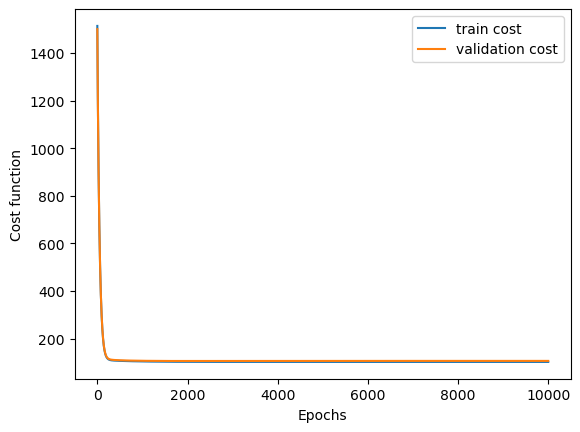

wandb: Agent Starting Run: mcwxp3la with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 16


lr_0.01_epoch_10000_neur_16
 epochs 0 Train error:  1630.59  validation error:   1560.27
 epochs 1000 Train error:  102.06  validation error:   105.96
 epochs 2000 Train error:  102.04  validation error:   106.30
 epochs 3000 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 5000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 7000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 9000 Train error:  102.04  validation error:   106.32


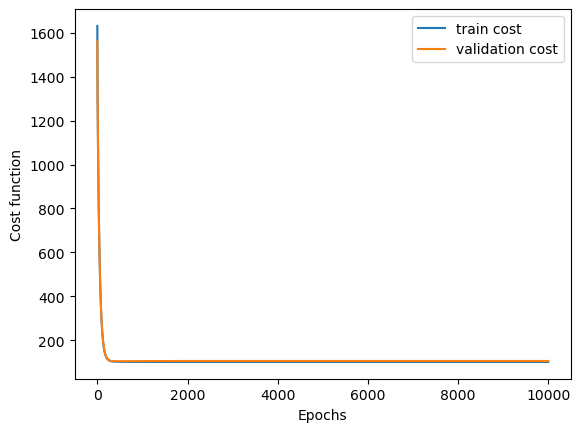

wandb: Agent Starting Run: 0437cvci with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.01
wandb: 	num_neurons: 32


lr_0.01_epoch_10000_neur_32
 epochs 0 Train error:  1734.47  validation error:   1509.09
 epochs 1000 Train error:  102.04  validation error:   106.36
 epochs 2000 Train error:  102.04  validation error:   106.32
 epochs 3000 Train error:  102.04  validation error:   106.32
 epochs 4000 Train error:  102.04  validation error:   106.32
 epochs 5000 Train error:  102.04  validation error:   106.32
 epochs 6000 Train error:  102.04  validation error:   106.32
 epochs 7000 Train error:  102.04  validation error:   106.32
 epochs 8000 Train error:  102.04  validation error:   106.32
 epochs 9000 Train error:  102.04  validation error:   106.32


wandb: Agent Starting Run: qjdneogd with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 8


lr_0.001_epoch_10000_neur_8
 epochs 0 Train error:  1542.05  validation error:   1544.11
 epochs 1000 Train error:  290.29  validation error:   295.45
 epochs 2000 Train error:  143.06  validation error:   146.88
 epochs 3000 Train error:  121.99  validation error:   125.57
 epochs 4000 Train error:  116.06  validation error:   119.87
 epochs 5000 Train error:  112.78  validation error:   116.95
 epochs 6000 Train error:  110.52  validation error:   114.99
 epochs 7000 Train error:  108.87  validation error:   113.53
 epochs 8000 Train error:  107.60  validation error:   112.37
 epochs 9000 Train error:  106.60  validation error:   111.39


wandb: Agent Starting Run: 7uilnabs with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 16


lr_0.001_epoch_10000_neur_16
 epochs 0 Train error:  1584.59  validation error:   1621.21
 epochs 1000 Train error:  260.75  validation error:   263.21
 epochs 2000 Train error:  124.46  validation error:   124.79
 epochs 3000 Train error:  107.88  validation error:   107.85
 epochs 4000 Train error:  105.17  validation error:   105.41
 epochs 5000 Train error:  104.19  validation error:   104.88
 epochs 6000 Train error:  103.59  validation error:   104.74
 epochs 7000 Train error:  103.16  validation error:   104.74
 epochs 8000 Train error:  102.84  validation error:   104.81
 epochs 9000 Train error:  102.62  validation error:   104.92


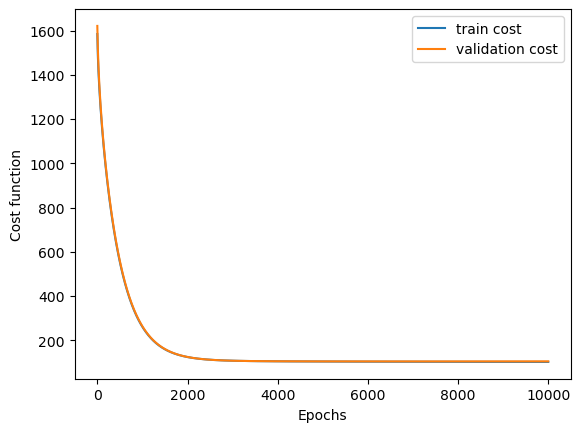

wandb: Agent Starting Run: 4wcne68t with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.001
wandb: 	num_neurons: 32


lr_0.001_epoch_10000_neur_32
 epochs 0 Train error:  1698.93  validation error:   1709.09
 epochs 1000 Train error:  251.68  validation error:   260.89
 epochs 2000 Train error:  118.00  validation error:   124.79
 epochs 3000 Train error:  103.67  validation error:   109.04
 epochs 4000 Train error:  102.21  validation error:   106.92
 epochs 5000 Train error:  102.05  validation error:   106.50
 epochs 6000 Train error:  102.04  validation error:   106.38
 epochs 7000 Train error:  102.04  validation error:   106.34
 epochs 8000 Train error:  102.04  validation error:   106.33
 epochs 9000 Train error:  102.04  validation error:   106.32


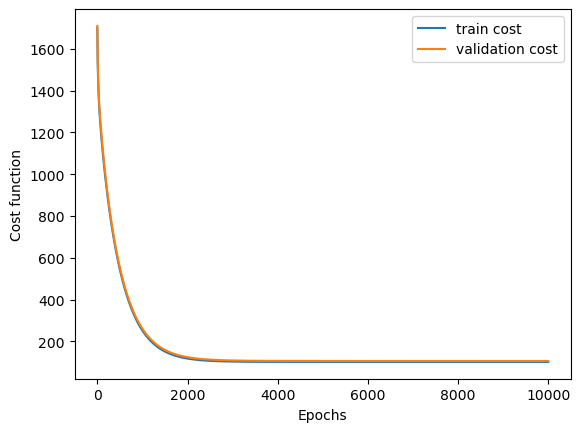

wandb: Agent Starting Run: p9aqe940 with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 8


lr_0.0001_epoch_10000_neur_8
 epochs 0 Train error:  1581.53  validation error:   1600.47
 epochs 1000 Train error:  1248.14  validation error:   1256.87
 epochs 2000 Train error:  1033.72  validation error:   1040.63
 epochs 3000 Train error:  857.95  validation error:   863.43
 epochs 4000 Train error:  712.49  validation error:   716.73
 epochs 5000 Train error:  592.31  validation error:   595.54
 epochs 6000 Train error:  493.46  validation error:   495.92
 epochs 7000 Train error:  412.65  validation error:   414.55
 epochs 8000 Train error:  347.08  validation error:   348.61
 epochs 9000 Train error:  294.31  validation error:   295.62


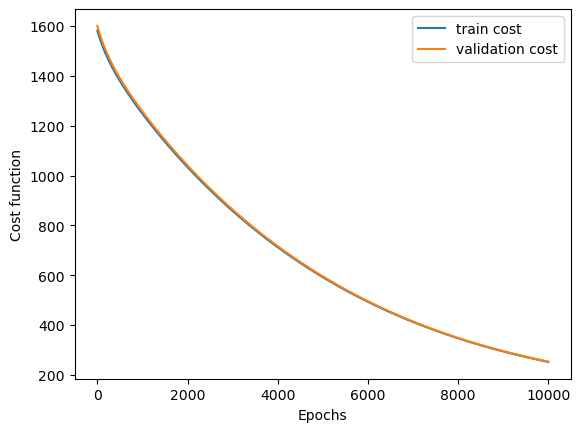

wandb: Agent Starting Run: tj46geln with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 16


lr_0.0001_epoch_10000_neur_16
 epochs 0 Train error:  1803.04  validation error:   1806.39
 epochs 1000 Train error:  1166.61  validation error:   1180.59
 epochs 2000 Train error:  959.67  validation error:   972.24
 epochs 3000 Train error:  797.43  validation error:   808.11
 epochs 4000 Train error:  666.36  validation error:   675.48
 epochs 5000 Train error:  560.00  validation error:   567.86
 epochs 6000 Train error:  473.59  validation error:   480.40
 epochs 7000 Train error:  403.38  validation error:   409.30
 epochs 8000 Train error:  346.37  validation error:   351.53
 epochs 9000 Train error:  300.11  validation error:   304.63


wandb: Agent Starting Run: zvlg48ug with config:
wandb: 	epochs: 10000
wandb: 	learning_rate: 0.0001
wandb: 	num_neurons: 32


lr_0.0001_epoch_10000_neur_32
 epochs 0 Train error:  1827.55  validation error:   1876.08
 epochs 1000 Train error:  1116.41  validation error:   1127.49
 epochs 2000 Train error:  919.89  validation error:   932.84
 epochs 3000 Train error:  761.72  validation error:   774.56
 epochs 4000 Train error:  633.44  validation error:   645.91
 epochs 5000 Train error:  529.37  validation error:   541.43
 epochs 6000 Train error:  445.03  validation error:   456.68
 epochs 7000 Train error:  376.79  validation error:   388.04
 epochs 8000 Train error:  321.68  validation error:   332.55
 epochs 9000 Train error:  277.27  validation error:   287.78


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [172]:
sweep_config = {
  "name": "hyperparameter optimization",
  "metric": {
      "name":"cost_validation",
      "goal": "minimize"
  },
  "method": "grid",
  "parameters": {
        "learning_rate": {
            "values": [0.01,0.001,0.0001]
        },
        "epochs": {
            "values": [3000,5000,10000]
        },
        "num_neurons": {
            "values": [8,16,32]
        }
    }
}

sweep_id = wandb.sweep(sweep_config, project="ID5030_ML_HW05")
wandb.agent(sweep_id, model_optimization)

#### HYPER-PARAMETER OPTIMIZATION RESULTS
BEST-CONFIGURATION:   
learning_rate=0.01  
epochs=5000  
neurons=8  


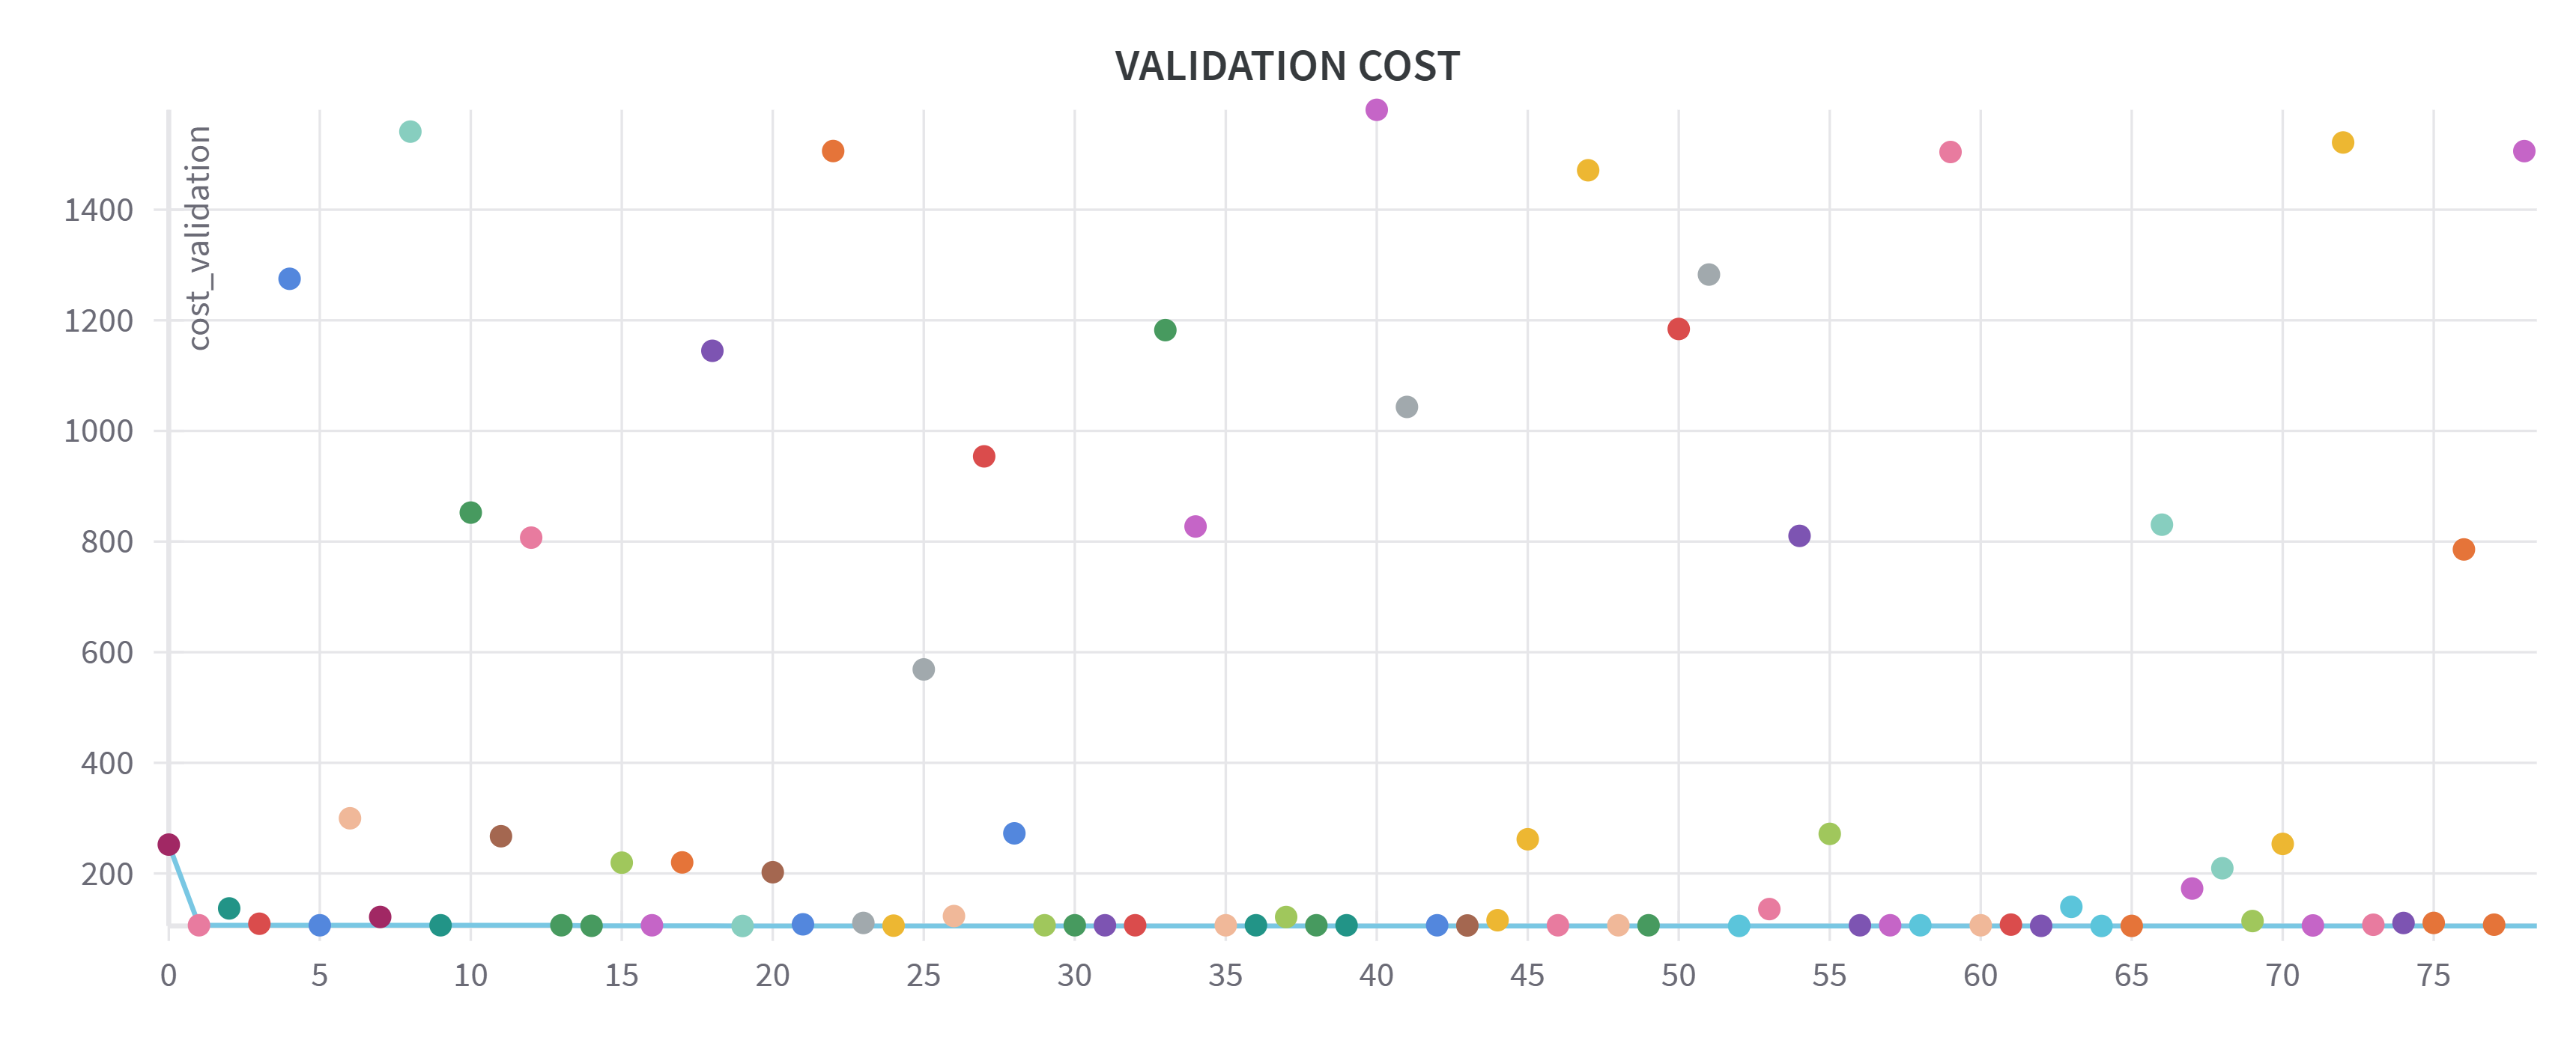

In [173]:
w1,w2,b1,b2=scratch_model(x_train,x_val,y_train,y_val,num_neurons=8,epochs=5000,learning_rate=0.01)

 
 epoch:   0  Train error:   1601.13 R2_score train -4.67 Val error:  1578.79  R2_validation: -4.60
 
 epoch: 500  Train error:    117.10 R2_score train 0.59 Val error:   122.55  R2_validation: 0.57
 
 epoch:1000  Train error:    102.08 R2_score train 0.64 Val error:   106.63  R2_validation: 0.62
 
 epoch:1500  Train error:    102.05 R2_score train 0.64 Val error:   106.56  R2_validation: 0.62
 
 epoch:2000  Train error:    102.04 R2_score train 0.64 Val error:   106.49  R2_validation: 0.62
 
 epoch:2500  Train error:    102.04 R2_score train 0.64 Val error:   106.45  R2_validation: 0.62
 
 epoch:3000  Train error:    102.04 R2_score train 0.64 Val error:   106.41  R2_validation: 0.62
 
 epoch:3500  Train error:    102.04 R2_score train 0.64 Val error:   106.39  R2_validation: 0.62
 
 epoch:4000  Train error:    102.04 R2_score train 0.64 Val error:   106.37  R2_validation: 0.62
 
 epoch:4500  Train error:    102.04 R2_score train 0.64 Val error:   106.36  R2_validation: 0.62


In [174]:
'''model evaluation using test data'''
a1,a2=forward_propogation(w1,b1,w2,b2,x_test)
cost_test=mean_squared_error_function(y_test,a2)
print(f'The value of test cost is {cost_test:.2f}')
r2_test=r2_score(y_test.T,a2.T)
print(f'R2-score of test data is :{r2_test:.3f}')

The value of test cost is 127.54
R2-score of test data is :0.511


### PYTORCH IMPLEMENTATION

In [175]:
#splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.20,random_state=1)
print(f'The shape of test data is:{x_test.shape}')
#splitting into train and validation data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size = 0.25,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
print(f'The shape of validation data is:{x_val.shape}')

The shape of test data is:(206, 8)
The shape of training data is:(618, 8)
The shape of validation data is:(206, 8)


In [176]:
x_train=normalise_data(x_train)
x_test=normalise_data(x_test)
x_val=normalise_data(x_val)
y_train=y_train.reshape(y_train.shape[0],1)
y_val=y_val.reshape(y_val.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(618, 8)
(206, 8)
(206, 8)
(618, 1)
(206, 1)
(206, 1)


In [177]:
x_train=torch.tensor(x_train,dtype=torch.float32)
x_test=torch.tensor(x_test,dtype=torch.float32)
x_val=torch.tensor(x_val,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)
y_val=torch.tensor(y_val,dtype=torch.float32)

In [178]:
print(type(x_train))
print(x_train.shape)

<class 'torch.Tensor'>
torch.Size([618, 8])


In [179]:
def R2_score(y,ypred):
    y = y.detach().numpy()
    ypred = ypred.detach().numpy()

    r2 = r2_score(y, ypred)
    return r2

In [195]:
def NN_model_b(x_train,y_train,x_val,y_val,learning_rate,hidden_size,num_epochs):
    input_size=x_train.shape[1]
    output_size=1
    model=nn.Sequential(nn.Linear(input_size,hidden_size,dtype=torch.float32),
                   nn.Linear(hidden_size,output_size,dtype=torch.float32))
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    J_train=[]
    J_val=[]
    R2_train=[]
    R2_val=[]
    for epoch in range(num_epochs):
        ypred = model(x_train)
        loss = criterion(ypred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ypred_val=model(x_val)
        loss_val=criterion(ypred_val,y_val)
        J_train.append(loss.item())
        J_val.append(loss_val.item())
        r2_score_train=R2_score(y_train,ypred)
        R2_train.append(r2_score_train)
        r2_score_val=R2_score(y_val,ypred_val)
        R2_val.append(r2_score_val)
        if (epoch+1)%(num_epochs/10)==0:
            print('Epoch [{}/{}], Train Loss: {:.2f}  Validation Loss:{:.2f}'.format(epoch+1, num_epochs, loss.item(),loss_val.item()))
            print('R2-Score-Train : {:.2f}  R2-Score-validation:{:.2f}'.format(R2_train[-1],R2_val[-1]))
    '''predicting cost of test data'''
    ypred_test=model(x_test)
    loss_test=criterion(ypred_test,y_test)
    print(f'Test Error :{loss_test:.2f}')       
    plt.plot(J_train,label='Train cost')
    plt.plot(J_val,label='Validation cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost function')
    plt.legend()
    plt.show()
    return model.parameters(),ypred_test

In [196]:
para,ypred_test=NN_model_b(x_train,y_train,x_val,y_val,learning_rate=0.01,hidden_size=8,num_epochs=500)

Epoch [50/500], Train Loss: 1160.01  Validation Loss:1154.26
R2-Score-Train : -3.11  R2-Score-validation:-3.09
Epoch [100/500], Train Loss: 559.59  Validation Loss:555.65
R2-Score-Train : -0.98  R2-Score-validation:-0.97
Epoch [150/500], Train Loss: 164.55  Validation Loss:161.72
R2-Score-Train : 0.42  R2-Score-validation:0.43
Epoch [200/500], Train Loss: 104.31  Validation Loss:104.47
R2-Score-Train : 0.63  R2-Score-validation:0.63
Epoch [250/500], Train Loss: 103.52  Validation Loss:104.23
R2-Score-Train : 0.63  R2-Score-validation:0.63
Epoch [300/500], Train Loss: 103.48  Validation Loss:104.43
R2-Score-Train : 0.63  R2-Score-validation:0.63
Epoch [350/500], Train Loss: 103.48  Validation Loss:104.50
R2-Score-Train : 0.63  R2-Score-validation:0.63
Epoch [400/500], Train Loss: 103.48  Validation Loss:104.52
R2-Score-Train : 0.63  R2-Score-validation:0.63
Epoch [450/500], Train Loss: 103.48  Validation Loss:104.53
R2-Score-Train : 0.63  R2-Score-validation:0.63
Epoch [500/500], Train 

In [197]:
ypred_test=ypred_test.detach().numpy()
y_test=y_test.detach().numpy()
r2_test=r2_score(y_test,ypred_test)
print(f'R2-score of test data is :{r2_test:.3f}')

R2-score of test data is :0.519


### INFERENCES
The hyperparameter optimization using WandB library gave the best possible configuration based on the lowest validation accuracy obtained and the results obtained using PyTorch for the same values were comparable with respect to the results obtained from the scratch implementation even though pytorch took lesser number of epochs to converge.

#### Q.2.c) How does the goodness of fit for your optimal neural network compare with the fit obtained for linear and quadratic regression in the earlier assignments?

Here, R2-score is used to measure the goodness of fit.  
R2-score of a dataset will lies in [0,1].  
1 is considered as the best-fit whereas 0 is considered as worst-fit.

### The results obtained when Quadratic features were added:-  
The number of parametres is: 45.  
The mean square error of train data using quadratic model is 49.89515908180179.  
R square value of test data is:0.8253902659354444.  
The mean square error of test data using quadratic model is 63.192268651067025.  
R square value of test data is:0.7589070199883018.  


### The results obtained using scratch implementation after hyper-parameter optimization:-
The mean square error of train data is 102.04  
The R2-Score of train data is 0.64   
The mean square error of validation data is 106.36    
The R2-Score of validation data is 0.62  
The value of test cost is 127.54  
R2-score of test data is :0.511

### The results obtained using PyTorch:-
The mean square error of train data is 103.48   
The R2-Score of train data is 0.63  
The mean square error of validation data is 104.53    
The R2-Score of validation data is 0.63    
The value of test cost is 125.27  
R2-score of test data is :0.519

### INFERENCES
From the above results, we can easily find that the quadratic model gave the better results.  
The R2-Score value was very high compared to other two, owing to its goodness of fit.  
The mean-squared-error value was less also which denotes the accuracy of predictions as well.  
As the number of quadratic features increased, the model became better comparatively.   